## Loan Analysis

 #### Introduction
 > This assignment aims to give you an idea of applying EDA in a real business scenario. In this assignment, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

#### Business Understanding
> The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.
 
> When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.
 
> The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:
The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,
All other cases: All other cases when the payment is paid on time.
 
> When a client applies for a loan, there are four types of decisions that could be taken by the client/company):
Approved: The Company has approved loan Application
Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client, he received worse pricing which he did not want.
Refused: The company had rejected the loan (because the client does not meet their requirements etc.).
Unused offer:  Loan has been cancelled by the client but at different stages of the process.
In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency to default.

#### Business Objectives
> This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
> In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.
To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough.

#### Import required libs

In [141]:
# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

In [142]:
# Filtering out the warnings
import warnings
warnings.filterwarnings('ignore')

In [143]:
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)

#### Read Dataset

1. 'application_data.csv'  contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data on whether the previous application had been Approved, Cancelled, Refused or Unused offer.
 
3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

In [144]:
app_data= pd.read_csv('application_data.csv')
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [145]:
# number of rows and columns
app_data.shape

(307511, 122)

In [146]:
#column wise information
app_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [147]:
app_data.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307509.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.00000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.056720,2.152665,2.052463,2.031521,12.063419,0.015144,0.050769,0.040659,0.078173,0.230454,0.179555,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.97

In [148]:
prev_app_data= pd.read_csv('previous_application.csv')
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
# number of rows and columns
prev_app_data.shape

(1670214, 37)

In [150]:
#column wise information
prev_app_data.info('all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [151]:
prev_app_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [152]:
#colDesc= pd.read_csv('columns_description.csv')
#colDesc.head(500)

### DATA CLEANING

In [153]:
# Check missing values
app_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [154]:
# Check missing value percentage
(app_data.isnull().sum()/len(app_data)*100).sort_values(ascending = False)

COMMONAREA_MEDI                 69.872297
COMMONAREA_AVG                  69.872297
COMMONAREA_MODE                 69.872297
NONLIVINGAPARTMENTS_MODE        69.432963
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAPARTMENTS_MEDI        69.432963
FONDKAPREMONT_MODE              68.386172
LIVINGAPARTMENTS_MODE           68.354953
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAPARTMENTS_MEDI           68.354953
FLOORSMIN_AVG                   67.848630
FLOORSMIN_MODE                  67.848630
FLOORSMIN_MEDI                  67.848630
YEARS_BUILD_MEDI                66.497784
YEARS_BUILD_MODE                66.497784
YEARS_BUILD_AVG                 66.497784
OWN_CAR_AGE                     65.990810
LANDAREA_MEDI                   59.376738
LANDAREA_MODE                   59.376738
LANDAREA_AVG                    59.376738
BASEMENTAREA_MEDI               58.515956
BASEMENTAREA_AVG                58.515956
BASEMENTAREA_MODE               58.515956
EXT_SOURCE_1                    56

In [155]:
## Remove those column whose missing values are too high and dont have any justification
# Get index of columns from csv
app_data.drop(columns = (app_data.iloc[:,44:91].columns), inplace = True)
app_data.drop(columns = (app_data.iloc[:,41:42].columns), inplace = True)

In [156]:
app_data.shape

(307511, 74)

In [157]:
app_data.isnull().sum()

SK_ID_CURR                          0
TARGET                              0
NAME_CONTRACT_TYPE                  0
CODE_GENDER                         0
FLAG_OWN_CAR                        0
FLAG_OWN_REALTY                     0
CNT_CHILDREN                        0
AMT_INCOME_TOTAL                    0
AMT_CREDIT                          0
AMT_ANNUITY                        12
AMT_GOODS_PRICE                   278
NAME_TYPE_SUITE                  1292
NAME_INCOME_TYPE                    0
NAME_EDUCATION_TYPE                 0
NAME_FAMILY_STATUS                  0
NAME_HOUSING_TYPE                   0
REGION_POPULATION_RELATIVE          0
DAYS_BIRTH                          0
DAYS_EMPLOYED                       0
DAYS_REGISTRATION                   0
DAYS_ID_PUBLISH                     0
OWN_CAR_AGE                    202929
FLAG_MOBIL                          0
FLAG_EMP_PHONE                      0
FLAG_WORK_PHONE                     0
FLAG_CONT_MOBILE                    0
FLAG_PHONE  

In [158]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIR

### Handleing Null Values

In [159]:
# into %
(app_data.isnull().sum()/len(app_data)*100).sort_values(ascending = False)

OWN_CAR_AGE                    65.990810
OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
NAME_TYPE_SUITE                 0.420148
OBS_30_CNT_SOCIAL_CIRCLE        0.332021
DEF_30_CNT_SOCIAL_CIRCLE        0.332021
OBS_60_CNT_SOCIAL_CIRCLE        0.332021
DEF_60_CNT_SOCIAL_CIRCLE        0.332021
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
DAYS_LAST_PHONE_CHANGE          0.000325
FLAG_DOCUMENT_16                0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_21                0.000000
FLAG_DOCUMENT_20                0.000000
FLAG_DOCUMENT_19                0.000000
FLAG_DOCUMENT_2 

In [160]:
# AMT_ANNUITY

missingvalues = app_data[app_data['AMT_ANNUITY'].isnull()]
len(missingvalues)
app_data[app_data['AMT_ANNUITY'].isnull()]

12

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Unaccompanied,Commercial associate,Incomplete higher,Single / not married,House / apartment,0.026392,-10668,-2523,-4946.0,-3238,NaN,1,1,1,1,1,0,High skill tech staff,1.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.626896,0.372334,1.0,0.0,1.0,0.0,-2.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Unaccompanied,Working,Lower secondary,Civil marriage,House / apartment,0.035792,-9027,-1270,-3640.0,-741,NaN,1,1,1,1,0,0,Laborers,2.0,2,2,MONDAY,20,0,0,0,0,0,0,Business Entity Type 1,0.727274,0.468660,0.0,0.0,0.0,0.0,-706.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.046220,-17376,-3950,-11524.0,-831,NaN,1,1,0,1,0,0,Cooking staff,2.0,1,1,WEDNESDAY,15,0,0,0,1,1,1,Self-employed,0.738370,0.452534,1.0,0.0,1.0,0.0,-199.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.035792,-11329,-2040,-3195.0,-3069,NaN,1,1,0,1,0,0,Core staff,2.0,2,2,FRIDAY,13,0,0,0,1,1,1,Government,0.566316,0.220095,0.0,0.0,0.0,0.0,-2841.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.046220,-19762,-2498,-11285.0,-3305,4.0,1,1,1,1,1,0,Laborers,1.0,1,1,FRIDAY,15,0,1,1,0,1,1,Other,0.583947,0.177704,0.0,0.0,0.0,0.0,-743.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Unaccompanied,Working,Higher education,Single / not married,Rented apartment,0.022800,-20831,-2450,-771.0,-4203,8.0,1,1,0,1,0,0,Drivers,1.0,2,2,FRIDAY,15,0,0,0,0,0,0,Business Entity Type 3,0.667564,0.425893,0.0,0.0,0.0,0.0,-1986.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,Unaccompanied,State servant,Secondary / secondary special,Married,House / apartment,0.015221,-12134,-3721,-858.0,-591,2.0,1,1,0,1,1,0,Medicine staff,2.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Medicine,0.154811,0.297087,0.0,0.0,0.0,0.0,-348.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Unaccompanied,Working,Secondary / secondary sp

In [161]:
# As AM_ANNUITY is value column we will take mean
app_data['AMT_ANNUITY'].fillna(value=round(app_data['AMT_ANNUITY'].mean(),1), inplace = True)

In [162]:
app_data.CODE_GENDER.value_counts()
#Lets replace XNA with Female as XNA count is very small and data for female is huge
app_data.CODE_GENDER = app_data.CODE_GENDER.replace('XNA','F')

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [163]:
#NAME_TYPE_SUITE 
app_data[app_data['NAME_TYPE_SUITE'].isnull()].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
64,100076,0,Cash loans,M,Y,N,0,180000.0,315000.0,9679.5,315000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.028663,-13866,-2546,-5448.0,-4097,1.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,12,0,0,0,0,0,0,Transport: type 3,0.584887,0.095070,0.0,0.0,0.0,0.0,-3.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.024610,-10072,-381,-519.0,-1834,NaN,1,1,1,1,0,0,Core staff,4.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,Kindergarten,0.378174,NaN,2.0,1.0,2.0,1.0,-2011.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1199,101414,0,Cash loans,M,Y,N,0,135000.0,533668.5,34636.5,477000.0,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,0.046220,-21717,-2393,-5486.0,-4513,5.0,1,1,0,1,0,0,NaN,2.0,1,1,SUNDAY,10,0,0,0,0,0,0,Transport: type 3,0.756676,0.544235,3.0,0.0,3.0,0.0,-3.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,4.0,0.0,0.0
1669,101954,0,Cash loans,F,Y,N,2,153000.0,1162170.0,30654.0,832500.0,NaN,State servant,Higher education,Separated,House / apartment,0.024610,-12975,-1839,-3896.0,-2179,1.0,1,1,0,1,1,0,Core staff,3.0,2,2,THURSDAY,12,0,0,0,0,0,0,Government,0.685813,0.528093,0.0,0.0,0.0,0.0,-2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1862,102183,0,Cash loans,F,Y,N,0,121500.0,268659.0,13774.5,243000.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,0.010147,-12870,-2822,-777.0,-4371,3.0,1,1,1,1,1,0,NaN,2.0,2,2,THURSDAY,11,0,0,0,0,1,1,Business Entity Type 3,0.492076,0.178760,2.0,0.0,2.0,0.0,-326.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0,0.0,2.0,0.0


In [164]:
app_data['NAME_TYPE_SUITE'].value_counts(dropna=False)

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [165]:
# As NAME_TYPE_SUITE is catogorial column we can take mode 
app_data['NAME_TYPE_SUITE'].fillna(value=(app_data['NAME_TYPE_SUITE'].mode()[0]), inplace = True)

In [166]:
app_data['NAME_TYPE_SUITE'].value_counts(dropna=False)

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [167]:
app_data['NAME_TYPE_SUITE'].value_counts(dropna=False)

Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [168]:
# OWN CAR AGE
app_data[app_data['OWN_CAR_AGE'].isnull()].head(100)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,454500.0,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,0.035792,-16941,-1588,-4970.0,-477,NaN,1,1,1,1,1,0,Laborers,2.0,2,2,WEDNESDAY,16,0,0,0,0,0,0,Other,0.354225,0.621226,0.0,0.0,0.0,0.0,-2536.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,NaN,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,405000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.019689,-14469,-2019,-14437.0,-3992,NaN,1,1,0,1,0,0,Laborers,1.0,2,2,THURSDAY,8,0,0,0,0,0,0,Electricity,0.746644,NaN,2.0,0.0,2.0,0.0,-1673.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
10,100014,0,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,652500.0,Unaccompanied,Working,Higher education,Married,House / apartmen

In [169]:
app_data['OWN_CAR_AGE'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 307511 entries, 0 to 307510
Series name: OWN_CAR_AGE
Non-Null Count   Dtype  
--------------   -----  
104582 non-null  float64
dtypes: float64(1)
memory usage: 2.3 MB


In [170]:
#customer without car, own age is NaN
app_data[app_data['FLAG_OWN_CAR'] == 'N'][['FLAG_OWN_CAR' ,'OWN_CAR_AGE']].head()

,FLAG_OWN_CAR,OWN_CAR_AGE
0,N,NaN
1,N,NaN
3,N,NaN
4,N,NaN
5,N,NaN


In [171]:
#All persons who have no car has own car age null. Which is valid data
app_data[app_data['FLAG_OWN_CAR'] == 'N'].shape
app_data['OWN_CAR_AGE'].isnull().sum()

(202924, 74)

202929

In [172]:
# OCCUPATION TYPE null value with NAME INCOME TYPE
app_data[app_data['OCCUPATION_TYPE'].isnull()]
# OCCUPATION TYPE null value with NAME INCOME TYPE
app_data[app_data['OCCUPATION_TYPE'].isnull()]['NAME_INCOME_TYPE'].value_counts()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,913500.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.018634,-20099,365243,-7427.0,-3514,NaN,1,0,0,1,0,0,NaN,2.0,2,2,WEDNESDAY,14,0,0,0,0,0,0,XNA,0.205747,0.751724,1.0,0.0,1.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
11,100015,0,Cash loans,F,N,Y,0,38419.155,148365.0,10678.5,135000.0,Children,Pensioner,Secondary / secondary special,Married,House / apartment,0.015221,-20417,365243,-5246.0,-2512,NaN,1,0,0,1,1,0,NaN,2.0,2,2,FRIDAY,7,0,0,0,0,0,0,XNA,0.555183,0.652897,0.0,0.0,0.0,0.0,-2396.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
23,100027,0,Cash loans,F,N,Y,0,83250.000,239850.0,23850.0,225000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.006296,-24827,365243,-9012.0,-3684,NaN,1,0,0,1,1,0,NaN,2.0,3,3,FRIDAY,12,0,0,0,0,0,0,XNA,0.624305,0.669057,0.0,0.0,0.0,0.0,-795.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
28,100033,0,Cash loans,M,Y,Y,0,270000.000,790830.0,57676.5,675000.0,Unaccompanied,State servant,Higher education,Single / not married,House / apartment,0.046220,-9994,-1796,-4668.0,-2661,1.0,1,1,0,1,0,1,NaN,1.0,1,1,WEDNESDAY,11,0,1,1,0,0,0,Military,0.685011,0.524496,0.0,0.0,0.0,0.0,-849.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,1.0
30,100035,0,Cash loans,F,N,Y,0,292500.000,665892.0,24592.5,477000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.025164,-15280,-2668,-5266.0,-3787,NaN,1,1,0,1,0,1,NaN,2.0,2,2,WEDNESDAY,13,0,0,0,0,0,0,Business Entity Type 3,0.479987,0.410103,0.0,0.0,0.0,0.0,-1634.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307486,456230,0,Cash loans,F,Y,Y,1,292500.000,355536.0,18283.5,270000.0,Unaccompanied,Commercial associate,Higher education,Civil marriage,House / apartment,0.072508,-16010,-1185,-5034.0,-4392,9.0,1,1,0,1,1,0,NaN,3.0,1,1,SATURDAY,17,0,0,0,0,0,0,Business Entity Type 2,0.661025,0.199771,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
307487,456231,0,Cash loans,M,N,Y,0,117000.000,1071909.0,31473.0,936000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.010147,-23125,365243,-5485.0,-4115,NaN,1,0,0,1,0,0,NaN,2.0

Pensioner               55357
Working                 24920
Commercial associate    12297
State servant            3787
Unemployed                 22
Student                     5
Businessman                 2
Maternity leave             1
Name: NAME_INCOME_TYPE, dtype: int64

In [173]:
app_data['OCCUPATION_TYPE'].value_counts(dropna = False)

NaN                      96391
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [174]:
#We can set occupation type as income type for null values

In [175]:
app_data['OCCUPATION_TYPE']=np.where(app_data['OCCUPATION_TYPE'].isnull() ,app_data['NAME_INCOME_TYPE'],app_data['OCCUPATION_TYPE'])

In [176]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [177]:
#Categorical columns
app_data.select_dtypes(include='object').columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')

In [178]:
#Numerical Columns
app_data.select_dtypes(include=['int64', 'float64']).columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3',
       'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8'

In [179]:
#Flag columns looks to be irrelevant Deleting column start with FLAG
for i in app_data.columns:
    if i.startswith("FLAG"):
        app_data.drop(columns=i, inplace = True)

In [180]:
# Few more columns looks to be irrelevant 
irr_colnms = ['DAYS_REGISTRATION','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION',
                   'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE',
                  'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
                  'NAME_TYPE_SUITE']

In [181]:
app_data = app_data.drop(irr_colnms, axis = 1)

In [182]:
app_data.shape

(307511, 33)

In [183]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

#### Now no of columns are 46

In [184]:
(app_data.isnull().mean() * 100).sort_values(ascending= False)

OWN_CAR_AGE                    65.990810
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
CNT_FAM_MEMBERS                 0.000650
ORGANIZATION_TYPE               0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
OCCUPATION_TYPE                 0.000000
SK_ID_CURR                      0.000000
TARGET                          0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
REGION_POPULATION_RELATIVE      0.000000
NAME_HOUSING_TYPE               0.000000
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_T

In [185]:
# OWN_CAR_AGE and OCCUPATION_TYPE have valid null values

# EXT_SOURCE_3 : 19.825307% of missing Value.
app_data['EXT_SOURCE_3'].isnull().mean()

0.19825307062186392

<AxesSubplot:ylabel='EXT_SOURCE_3'>

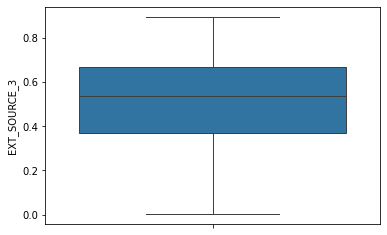

In [186]:
# Let us plot boxplot to check outliners
sns.boxplot(app_data["EXT_SOURCE_3"])
plt.show()

In [187]:
# We can see there are no outliners

In [188]:
app_data['EXT_SOURCE_3'].describe()

count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [189]:
#Mean and median values are nearly same. Let us use mean value to fill null value

In [190]:
app_data['EXT_SOURCE_3'] = app_data['EXT_SOURCE_3'].fillna(app_data['EXT_SOURCE_3'].mean())

In [191]:
app_data['EXT_SOURCE_3'].isnull().sum()

0

In [192]:
# All null values are substituted by mean

In [193]:
#Let us follow same approach for EXT_SOURCE_2

0.0021462646864665006

<AxesSubplot:ylabel='EXT_SOURCE_2'>

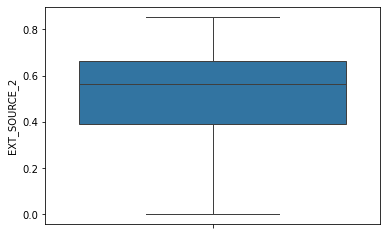

count    3.068510e+05
mean     5.143927e-01
std      1.910602e-01
min      8.173617e-08
25%      3.924574e-01
50%      5.659614e-01
75%      6.636171e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [194]:
app_data['EXT_SOURCE_2'].isnull().mean()
sns.boxplot(app_data["EXT_SOURCE_2"])
plt.show()
app_data['EXT_SOURCE_2'].describe()

In [195]:
app_data['EXT_SOURCE_2'] = app_data['EXT_SOURCE_2'].fillna(app_data['EXT_SOURCE_2'].mean())
app_data['EXT_SOURCE_2'].isnull().sum()

0

In [196]:
#Let us check AMT_GOODS_PRICE
app_data.AMT_GOODS_PRICE.isnull().mean()*100

0.09040327012692229

<Figure size 360x720 with 0 Axes>

<AxesSubplot:ylabel='AMT_GOODS_PRICE'>

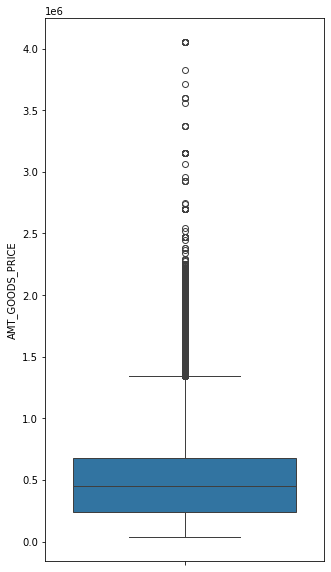

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [197]:
plt.figure(figsize = (5,10))
sns.boxplot(app_data.AMT_GOODS_PRICE)
plt.show()
app_data['AMT_GOODS_PRICE'].describe()

In [198]:
# There are too many outlights so we wont be able to use mean value for na records. We can exclude these records as the no is too small 0.090403

In [199]:
app_data = app_data[~np.isnan(app_data['AMT_GOODS_PRICE'])]

In [200]:
# Let use check AMT_ columns
# Start with AMT_REQ_CREDIT_BUREAU_QRT
app_data.AMT_REQ_CREDIT_BUREAU_QRT.isnull().mean()*100

13.498875446322497

In [201]:
app_data.AMT_REQ_CREDIT_BUREAU_QRT.describe()

count    265760.000000
mean          0.265525
std           0.794239
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [202]:
# Almost all values are 0 Lets check the count
app_data.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()

0.0      215219
1.0       33841
2.0       14400
3.0        1716
4.0         476
5.0          64
6.0          28
8.0           7
7.0           7
261.0         1
19.0          1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [203]:
# In this case most of the values are zero and data type is also int. So we can utilize mode value i.e. most used value

In [204]:
app_data.AMT_REQ_CREDIT_BUREAU_QRT = app_data.AMT_REQ_CREDIT_BUREAU_QRT.fillna(app_data.AMT_REQ_CREDIT_BUREAU_QRT.mode()[0])

In [205]:
# Let us see mean and mode values for other columns
app_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']].isnull().mean() *100
app_data[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_YEAR']].mode()

AMT_REQ_CREDIT_BUREAU_HOUR    13.498875
AMT_REQ_CREDIT_BUREAU_DAY     13.498875
AMT_REQ_CREDIT_BUREAU_WEEK    13.498875
AMT_REQ_CREDIT_BUREAU_MON     13.498875
AMT_REQ_CREDIT_BUREAU_YEAR    13.498875
dtype: float64

,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
0,0.0,0.0,0.0,0.0,0.0


In [206]:
# We can see mean value is same and mode value for all is 0. Let us substitute mode value for all columns

app_data.AMT_REQ_CREDIT_BUREAU_HOUR = app_data.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(app_data.AMT_REQ_CREDIT_BUREAU_HOUR.mode()[0])
app_data.AMT_REQ_CREDIT_BUREAU_DAY = app_data.AMT_REQ_CREDIT_BUREAU_DAY.fillna(app_data.AMT_REQ_CREDIT_BUREAU_DAY.mode()[0])
app_data.AMT_REQ_CREDIT_BUREAU_WEEK = app_data.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(app_data.AMT_REQ_CREDIT_BUREAU_WEEK.mode()[0])
app_data.AMT_REQ_CREDIT_BUREAU_MON = app_data.AMT_REQ_CREDIT_BUREAU_MON.fillna(app_data.AMT_REQ_CREDIT_BUREAU_MON.mode()[0])
app_data.AMT_REQ_CREDIT_BUREAU_YEAR = app_data.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(app_data.AMT_REQ_CREDIT_BUREAU_YEAR.mode()[0])

In [207]:
(app_data.isnull().sum()/len(app_data)*100).sort_values(ascending = False)

OWN_CAR_AGE                    65.960037
SK_ID_CURR                      0.000000
AMT_REQ_CREDIT_BUREAU_QRT       0.000000
AMT_REQ_CREDIT_BUREAU_MON       0.000000
AMT_REQ_CREDIT_BUREAU_WEEK      0.000000
AMT_REQ_CREDIT_BUREAU_DAY       0.000000
AMT_REQ_CREDIT_BUREAU_HOUR      0.000000
EXT_SOURCE_3                    0.000000
EXT_SOURCE_2                    0.000000
ORGANIZATION_TYPE               0.000000
REG_REGION_NOT_WORK_REGION      0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REGION_RATING_CLIENT            0.000000
CNT_FAM_MEMBERS                 0.000000
OCCUPATION_TYPE                 0.000000
DAYS_ID_PUBLISH                 0.000000
TARGET                          0.000000
DAYS_EMPLOYED                   0.000000
DAYS_BIRTH                      0.000000
REGION_POPULATION_RELATIVE      0.000000
NAME_HOUSING_TYPE               0.000000
NAME_FAMILY_STATUS              0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_INCOME_TYPE

In [208]:
# All null values are removed

#### Validating column data and restructing the same.

In [209]:
app_data[['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH']].head()


,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH
0,-9461,-637,-2120
1,-16765,-1188,-291
2,-19046,-225,-2531
3,-19005,-3039,-2437
4,-19932,-3038,-3458


In [210]:
# Days cant be negative so lets use absolute function

In [211]:
app_data.DAYS_BIRTH = app_data.DAYS_BIRTH.abs()
app_data.DAYS_EMPLOYED = app_data.DAYS_EMPLOYED.abs()
app_data.DAYS_ID_PUBLISH = app_data.DAYS_ID_PUBLISH.abs()

In [212]:
#It will be easy to analyse data with respect to age in years instead of Daya. Let us introduce new column Age

In [213]:
app_data['AGE'] = round(app_data.DAYS_BIRTH/365).astype('int')
app_data.drop(['DAYS_BIRTH'], axis = 1, inplace = True)

In [214]:
#Check for outlers

In [215]:
def plotBoxPlot(name):
    plt.figure(figsize = (7,10))
    sns.boxplot(app_data[name])
    plt.show()


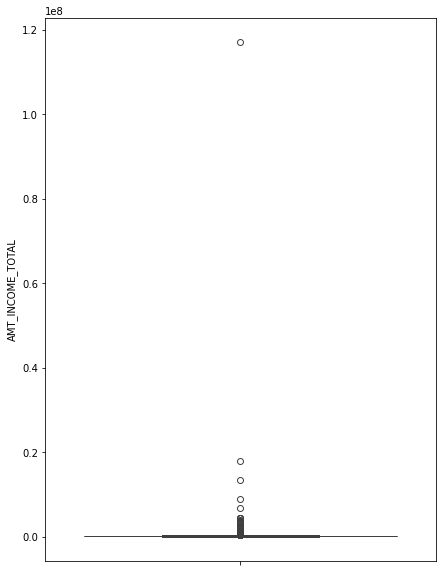

count    3.072330e+05
mean     1.688332e+05
std      2.372157e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.485000e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

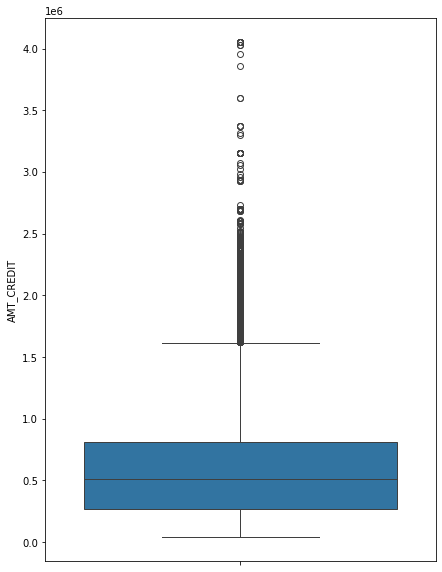

count    3.072330e+05
mean     5.993150e+05
std      4.025177e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.146020e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

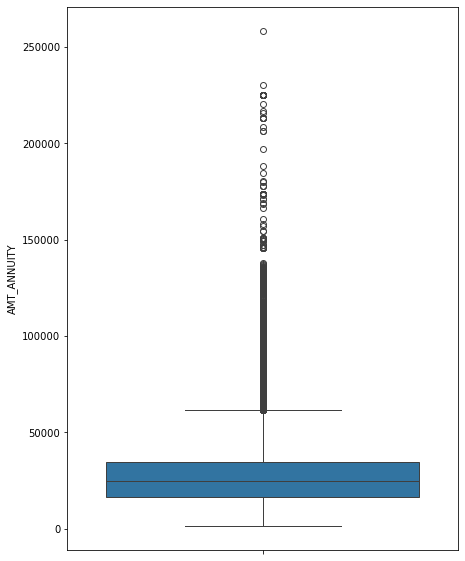

count    307233.000000
mean      27120.451894
std       14491.823789
min        1615.500000
25%       16551.000000
50%       24925.500000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

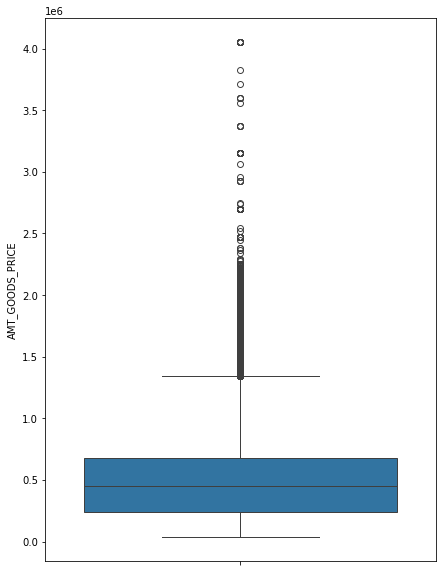

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

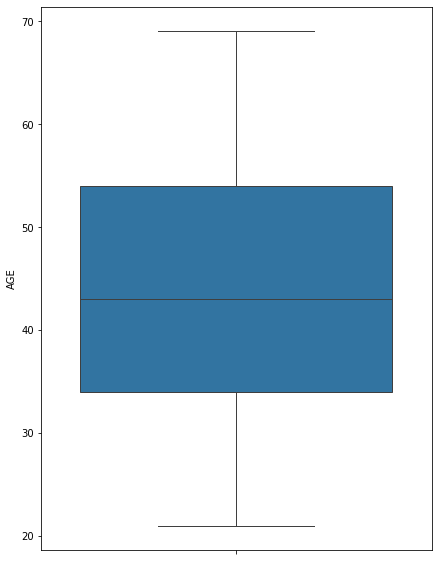

count    307233.000000
mean         43.943434
std          11.963627
min          21.000000
25%          34.000000
50%          43.000000
75%          54.000000
max          69.000000
Name: AGE, dtype: float64

In [216]:
# Let us check if there are any outliers in numerical columns

variable_list = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','AGE']
for variable in variable_list:
    plotBoxPlot(variable)
    app_data[variable].describe()

In [217]:
# We can see there are outliers in every column except AGE. Lets remove those outliers by capping upper bound

In [218]:
def setUpperBoundInapp_datata(name):
    q1=app_data[name].describe()["25%"]
    q3=app_data[name].describe()["75%"]
    interquartile_range=q3-q1 #interquartile range
    #lower_bound=q1-1.5*interquartile_range
    upper_bound=q3+1.5*interquartile_range
    app_data[name]=np.where(app_data[name]>upper_bound,upper_bound,app_data[name])

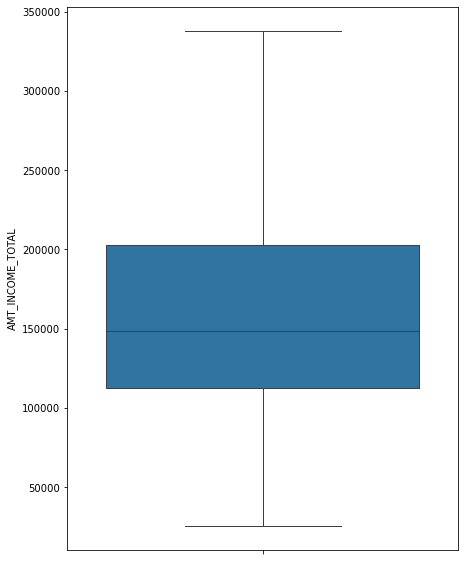

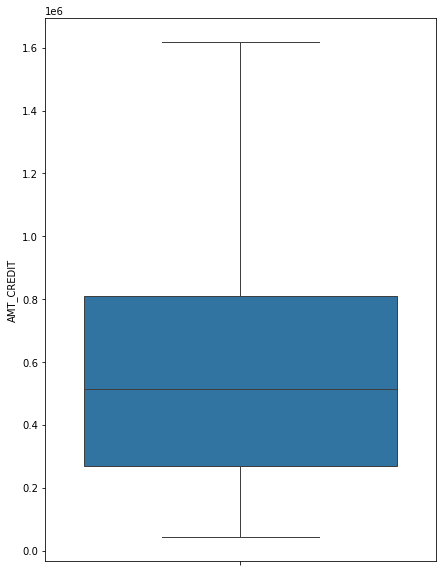

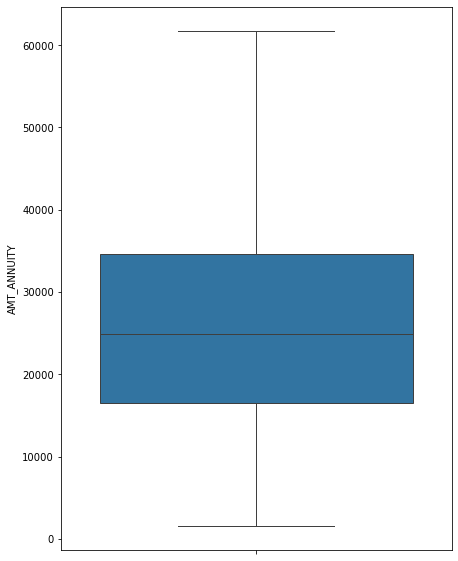

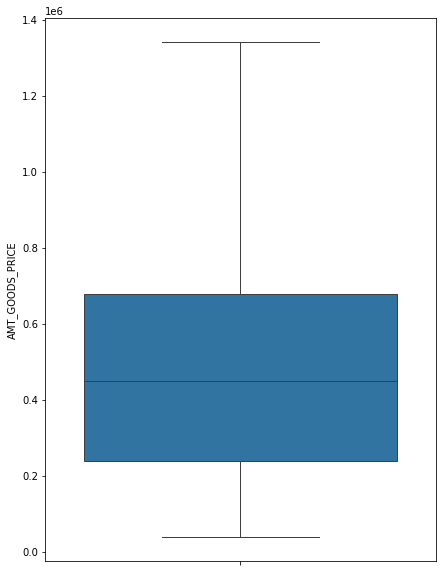

In [219]:
variable_list = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE']
for variable in variable_list:
    setUpperBoundInapp_datata(variable)
    plotBoxPlot(variable)

In [220]:
# Now we can see outliers are removed

#### Data Analysis 

<Figure size 1800x1440 with 0 Axes>

<Figure size 432x432 with 0 Axes>

<AxesSubplot:ylabel='TARGET'>

<Figure size 1800x1440 with 0 Axes>

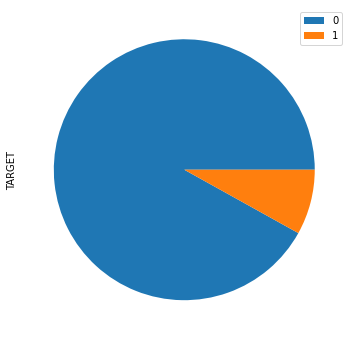

0    91.926649
1     8.073351
Name: TARGET, dtype: float64


<Figure size 432x432 with 0 Axes>

<AxesSubplot:ylabel='CODE_GENDER'>

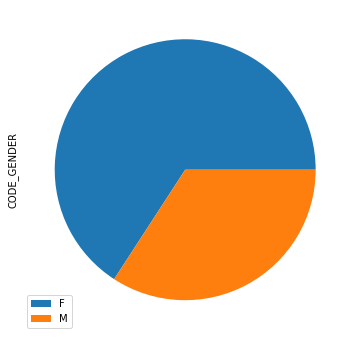

F    65.833748
M    34.166252
Name: CODE_GENDER, dtype: float64


<Figure size 432x432 with 0 Axes>

<AxesSubplot:ylabel='NAME_CONTRACT_TYPE'>

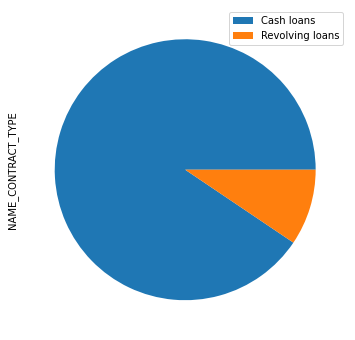

Cash loans         90.560584
Revolving loans     9.439416
Name: NAME_CONTRACT_TYPE, dtype: float64


<Figure size 432x432 with 0 Axes>

<AxesSubplot:ylabel='NAME_INCOME_TYPE'>

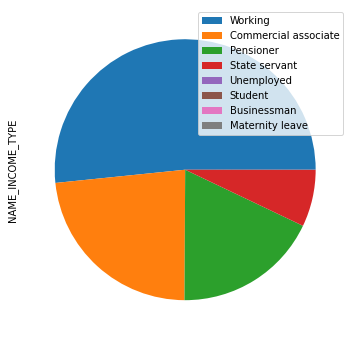

Working                 51.618478
Commercial associate    23.295024
Pensioner               18.012063
State servant            7.056534
Unemployed               0.007161
Student                  0.005859
Businessman              0.003255
Maternity leave          0.001627
Name: NAME_INCOME_TYPE, dtype: float64


<Figure size 432x432 with 0 Axes>

<AxesSubplot:ylabel='NAME_EDUCATION_TYPE'>

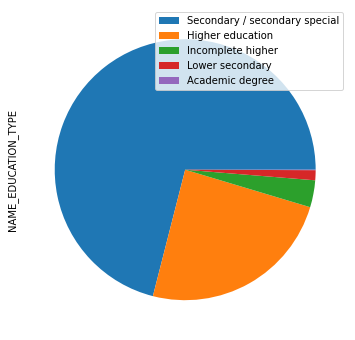

Secondary / secondary special    71.018087
Higher education                 24.345692
Incomplete higher                 3.341763
Lower secondary                   1.241078
Academic degree                   0.053380
Name: NAME_EDUCATION_TYPE, dtype: float64


<Figure size 432x432 with 0 Axes>

<AxesSubplot:ylabel='NAME_FAMILY_STATUS'>

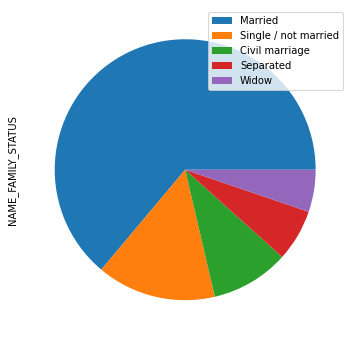

Married                 63.881484
Single / not married    14.772502
Civil marriage           9.683530
Separated                6.430624
Widow                    5.231860
Name: NAME_FAMILY_STATUS, dtype: float64


<Figure size 432x432 with 0 Axes>

<AxesSubplot:ylabel='NAME_FAMILY_STATUS'>

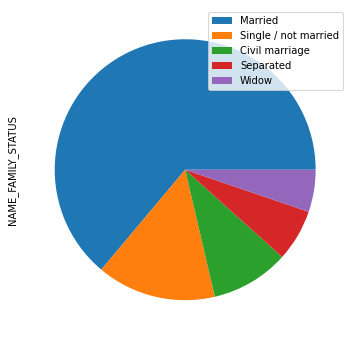

Married                 63.881484
Single / not married    14.772502
Civil marriage           9.683530
Separated                6.430624
Widow                    5.231860
Name: NAME_FAMILY_STATUS, dtype: float64


<Figure size 432x432 with 0 Axes>

<AxesSubplot:ylabel='NAME_HOUSING_TYPE'>

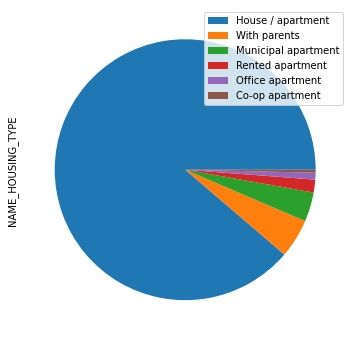

House / apartment      88.738514
With parents            4.824352
Municipal apartment     3.634375
Rented apartment        1.587069
Office apartment        0.851146
Co-op apartment         0.364544
Name: NAME_HOUSING_TYPE, dtype: float64


In [221]:
var_list = ['TARGET','CODE_GENDER','NAME_CONTRACT_TYPE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']
x = 0
plt.figure(figsize = (25,20))
for variable in var_list:
    x += 1
    #plt.subplot(3,3,x)
    #plt.title(variable, color = 'black')
    #app_data[variable].value_counts().plot(kind = 'bar')
    #print(app_data[variable].value_counts(normalize=True)*100,"\n")
    #plt.xticks(rotation= 90, fontsize = 10)
    #plt.yticks(rotation= 90, fontsize = 10)
    plt.figure(figsize=[6,6])
    app_data[variable].value_counts(normalize = True, dropna = False).plot.pie(labeldistance = None)
    plt.legend()
    plt.show()
    print(app_data[variable].value_counts(normalize = True, dropna = False)*100)    
    
    

> We can say below points from above graphs
* There are only 8% defaulters
* Female applicants are more than Male
* Cash loans are way more than revolving loans
* Loan applications of working professionals are around 50%. Other major chunks are commercial associates and pensioner
* Most of the applicants have done higher education and above
* Major chunk of applicants are married
* Most of the applicants have there own house or apartment

In [222]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE'],
      dtype='object')

In [223]:
# Let us create 2 array for categorial and continious data
#cat_data_cols = ['TARGET','NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE',
#       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','ORGANIZATION_TYPE','OCCUPATION_TYPE','NAME_CONTRACT_STATUS']
#cont_data_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED',
 #             'EXT_SOURCE_2', 'EXT_SOURCE_3','AGE']

#### Univariate Analysis

<Figure size 1800x3600 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:>

<AxesSubplot:xlabel='CODE_GENDER', ylabel='count'>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:>

<AxesSubplot:xlabel='NAME_INCOME_TYPE', ylabel='count'>

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:>

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='count'>

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000., 225000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:>

<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='count'>

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:>

<AxesSubplot:xlabel='NAME_HOUSING_TYPE', ylabel='count'>

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:>

<AxesSubplot:xlabel='ORGANIZATION_TYPE', ylabel='count'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, 

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:>

<AxesSubplot:xlabel='OCCUPATION_TYPE', ylabel='count'>

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

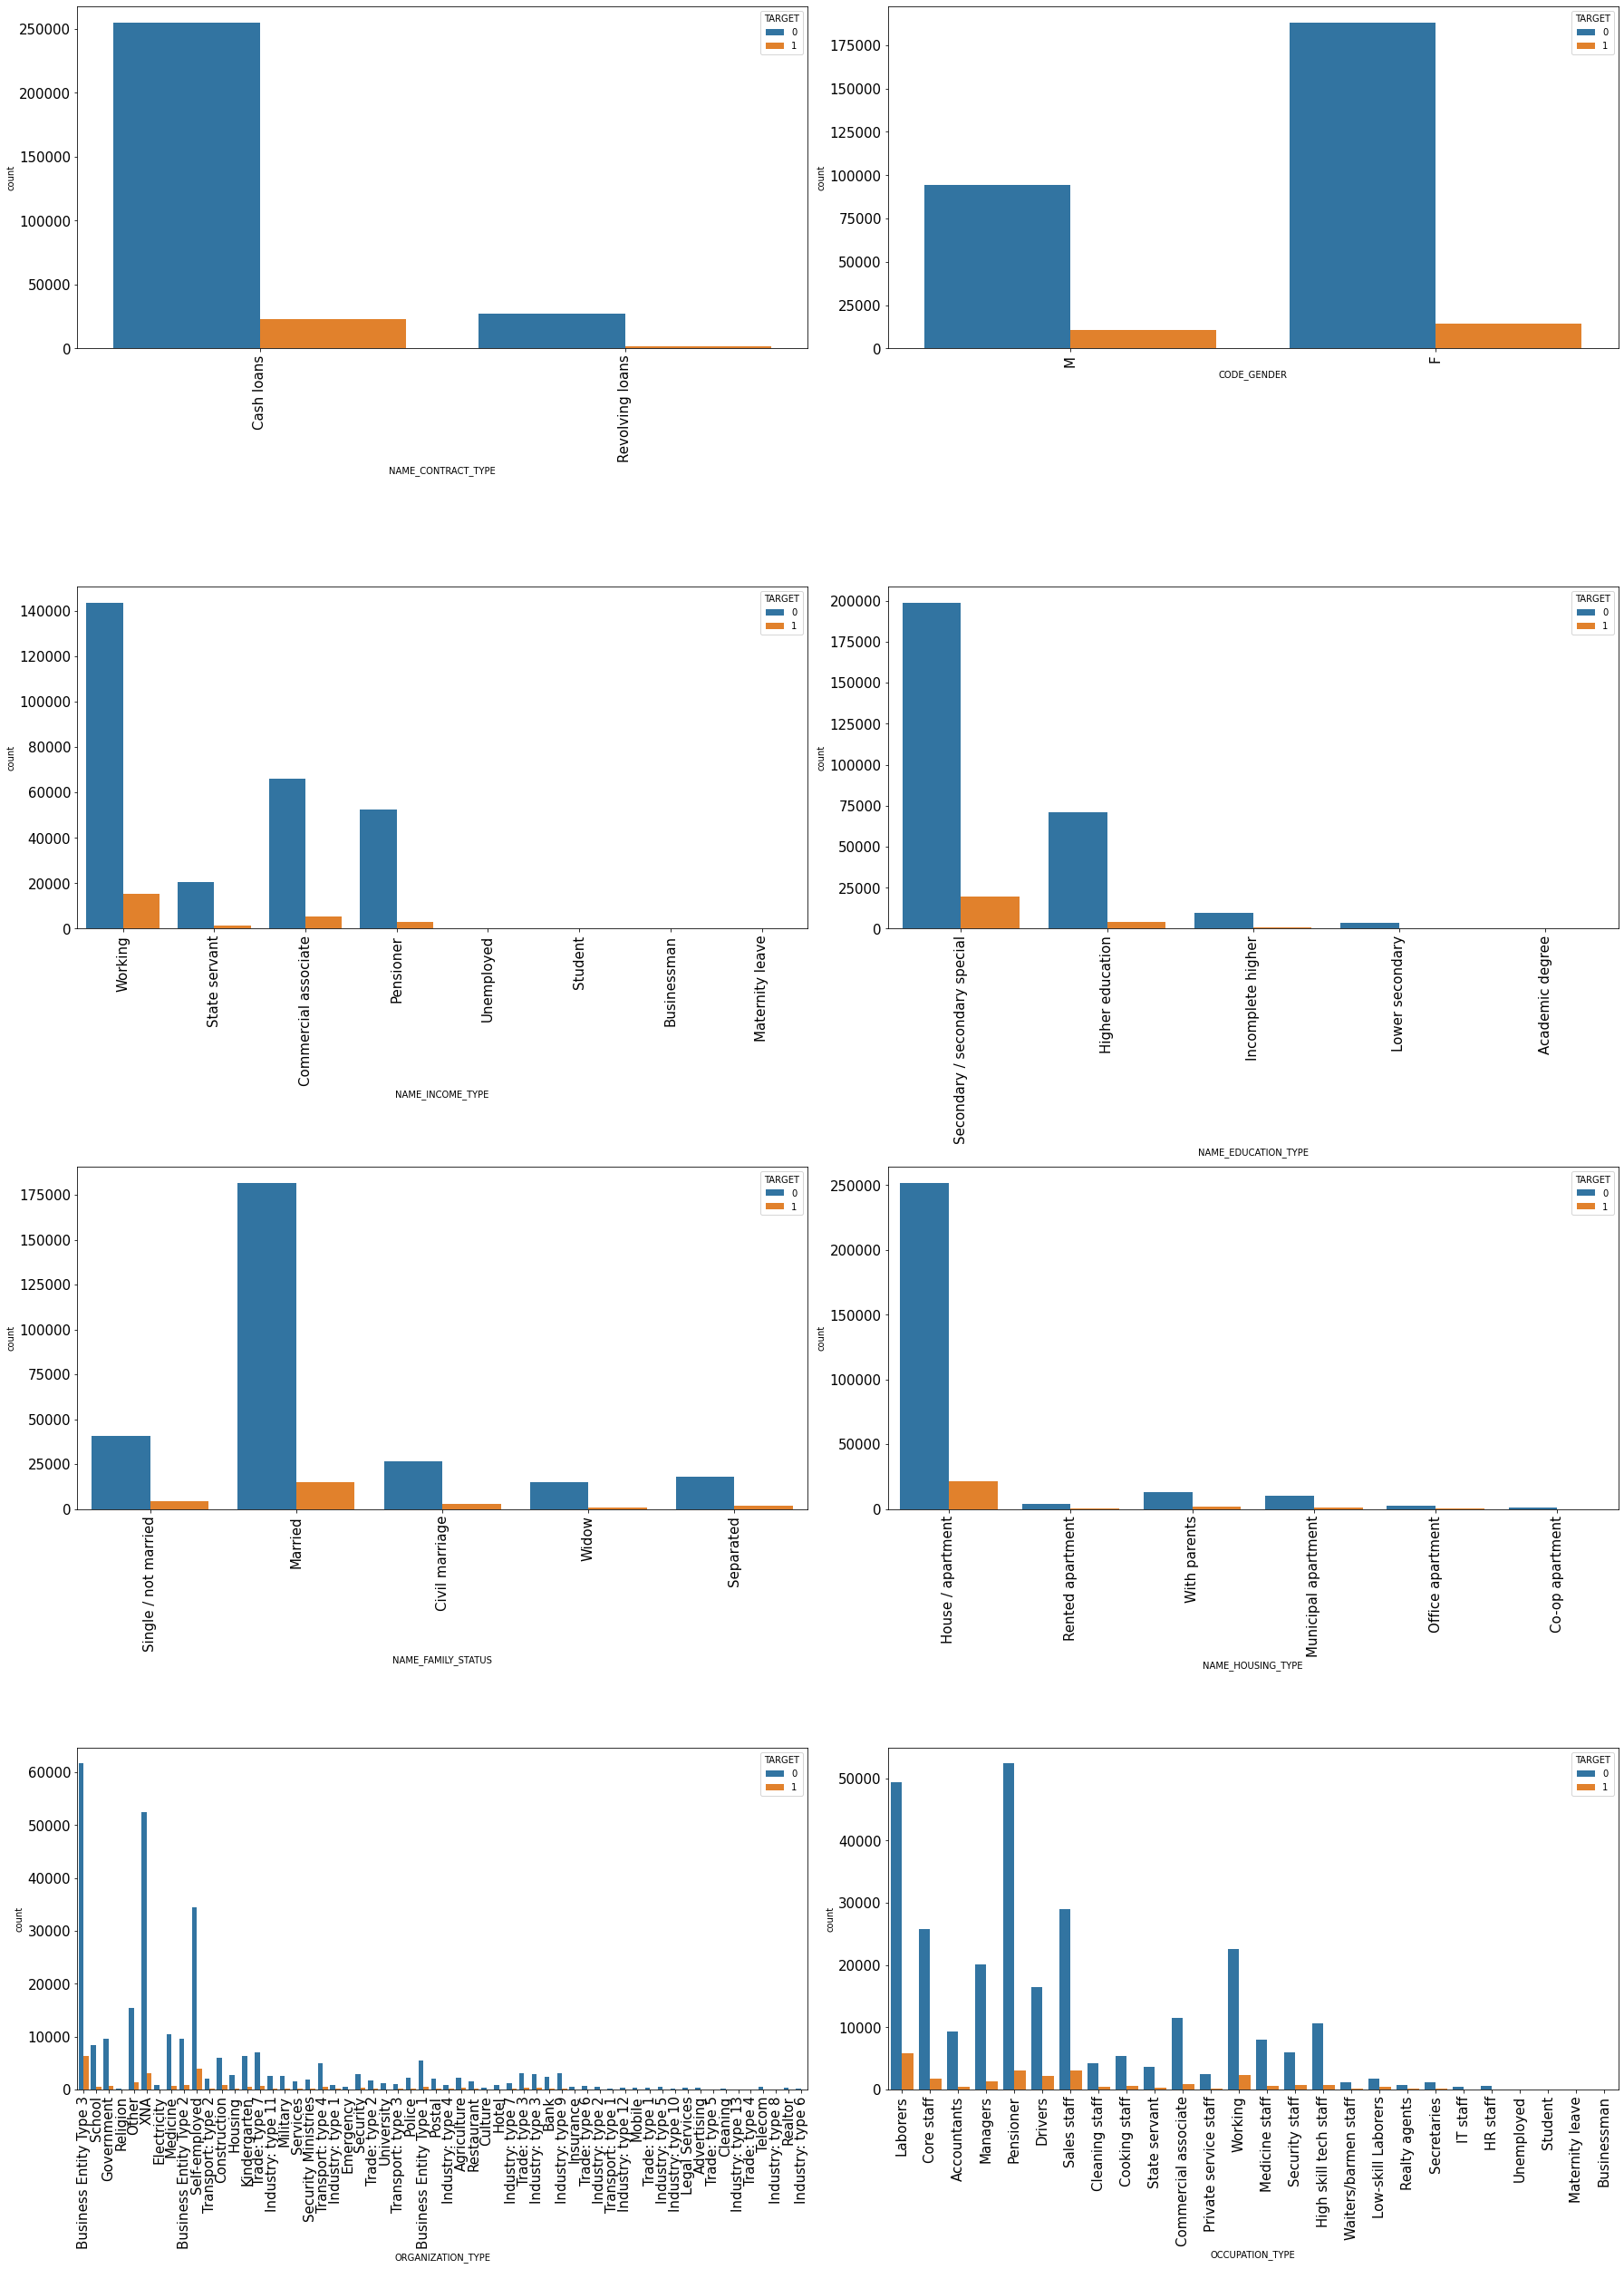

In [224]:
cat_data_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','ORGANIZATION_TYPE','OCCUPATION_TYPE']
x = 0
plt.figure(figsize = (25,50))
for variable in cat_data_cols:
    x += 1
    plt.subplot(6,2,x)
    sns.countplot(x = variable, hue = 'TARGET', data = app_data)
    plt.xticks(rotation= 90, fontsize = 15)
    plt.yticks(rotation= 0, fontsize = 15)
    
    plt.tight_layout()
    

> Analysis
* We can say that cash loans have more defaulters as people take more cash loans
* Comparatively same no of male and female are defaults. But defaulter ratio of females is smaller
* Working professions are more of a defaulters as they are more in applicants
* Secondary and higher secondary are more of defaulers
* Married applicants and defaulters are more
* House/apartment owners are more of defaulters
* Business Entry Type 3 are more defaulters than any other occupation
* Labors are comparitively more of defaulters
  

In [225]:
cont_data_cols = ['AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_GOODS_PRICE', 'AGE']

# Creating bins for continous variable categories column 'AMT_INCOME_TOTAL', 'AMT_GOODS_PRICE', 'AGE' and 'AMT_CREDIT'

bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

app_data['AMT_INCOME_RANGE'] = pd.cut(app_data['AMT_INCOME_TOTAL'], bins = bins, labels=slots)

bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

app_data['AMT_CREDIT_RANGE'] = pd.cut(app_data['AMT_CREDIT'], bins = bins, labels=slots)

bins = [0,100000,200000,300000,400000,500000,10000000000]
slots = ['<100000', '100000-200000','200000-300000','300000-400000','400000-500000', '500000 and above']

app_data['AMT_GOODS_PRICE_RANGE'] = pd.cut(app_data['AMT_GOODS_PRICE'], bins = bins, labels=slots)

bins = [0,10,20,30,40,50,60,70,80,90,1000]
slots = ['<10', '10-20','20-30','30-40','40-50', '50-60', '60-70', '70-80','80-90','90 and above']

app_data['AGE_RANGE'] = pd.cut(app_data['AGE'], bins = bins, labels=slots)

<Figure size 1800x3600 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='AMT_INCOME_RANGE', ylabel='count'>

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:>

<AxesSubplot:xlabel='AMT_CREDIT_RANGE', ylabel='count'>

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000., 160000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:>

<AxesSubplot:xlabel='AMT_GOODS_PRICE_RANGE', ylabel='count'>

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:>

<AxesSubplot:xlabel='AGE_RANGE', ylabel='count'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([    0., 10000., 20000., 30000., 40000., 50000., 60000., 70000.,
        80000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

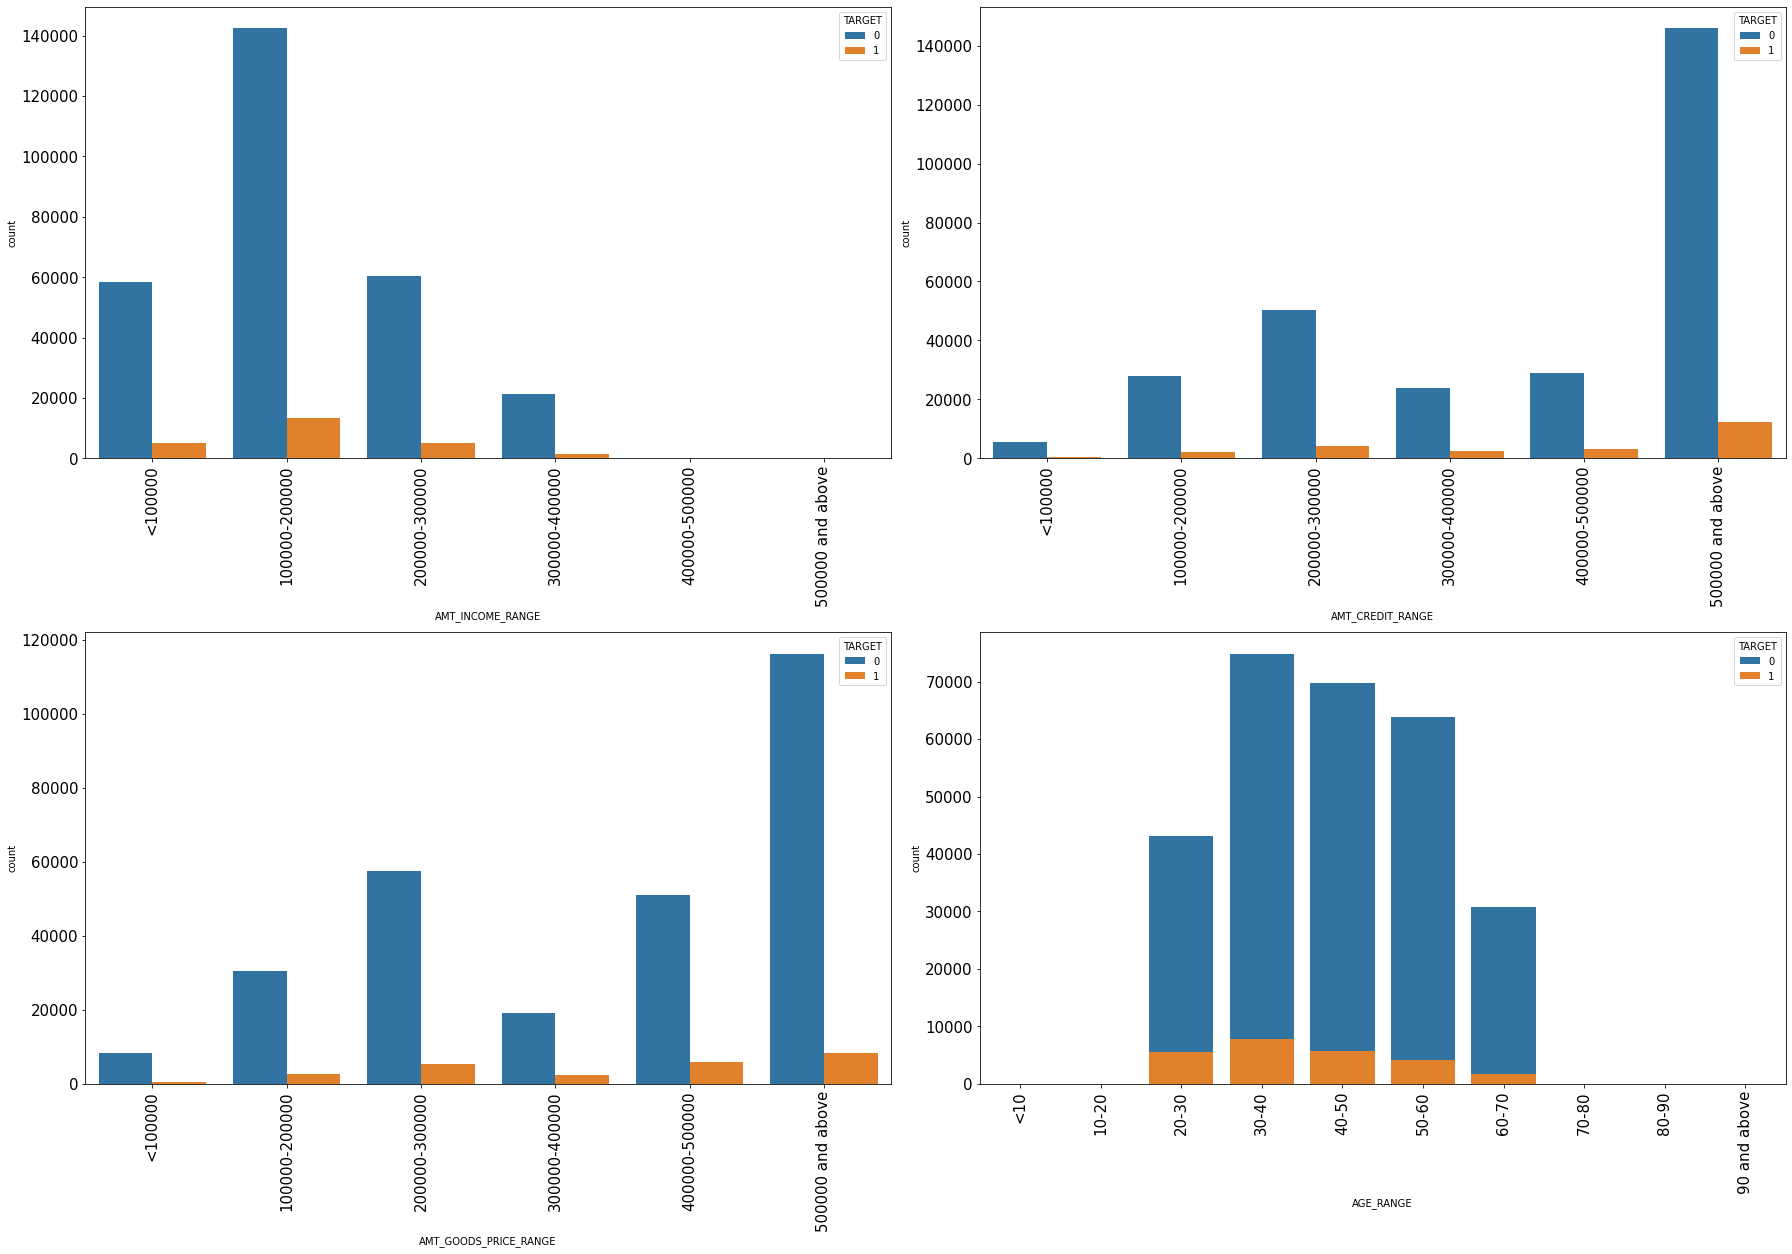

In [226]:
cant_data_cols = ['AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'AMT_GOODS_PRICE_RANGE',
       'AGE_RANGE']
x = 0
plt.figure(figsize = (25,50))
for variable in cant_data_cols:
    x += 1
    plt.subplot(6,2,x)
    sns.countplot(x = variable, hue = 'TARGET', data = app_data)
    plt.xticks(rotation= 90, fontsize = 15)
    plt.yticks(rotation= 0, fontsize = 15)
    
    plt.tight_layout()

> Analysis
* We can say people having income 10 to 20000 are more of defaulters
* Credit range more than 50000 are more of defaulters
* Average defaulter count in all goods price range is nealy same
* People with age 30-40 are more of defaults but again its applicants no is also high
  

## Multivariate analysis

,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AGE,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3
AMT_INCOME_TOTAL,1.000000,0.492671,0.414053,0.417680,-0.086546,-0.185568,0.172368,-0.078652
AMT_ANNUITY,0.492671,1.000000,0.794646,0.797659,-0.015179,-0.111516,0.127818,0.021064
AMT_CREDIT,0.414053,0.794646,1.000000,0.985841,0.049049,-0.071280,0.128416,0.032623
AMT_GOODS_PRICE,0.417680,0.797659,0.985841,1.000000,0.047632,-0.069913,0.135088,0.034671
AGE,-0.086546,-0.015179,0.049049,0.047632,1.000000,0.625852,0.078007,0.175173
DAYS_EMPLOYED,-0.185568,-0.111516,-0.071280,-0.069913,0.625852,1.000000,-0.028562,0.100203
EXT_SOURCE_2,0.172368,0.127818,0.128416,0.135088,0.078007,-0.028562,1.000000,0.076012
EXT_SOURCE_3,-0.078652,0.021064,0.032623,0.034671,0.175173,0.100203,0.076012,1.000000


<Figure size 1080x576 with 0 Axes>

<AxesSubplot:>

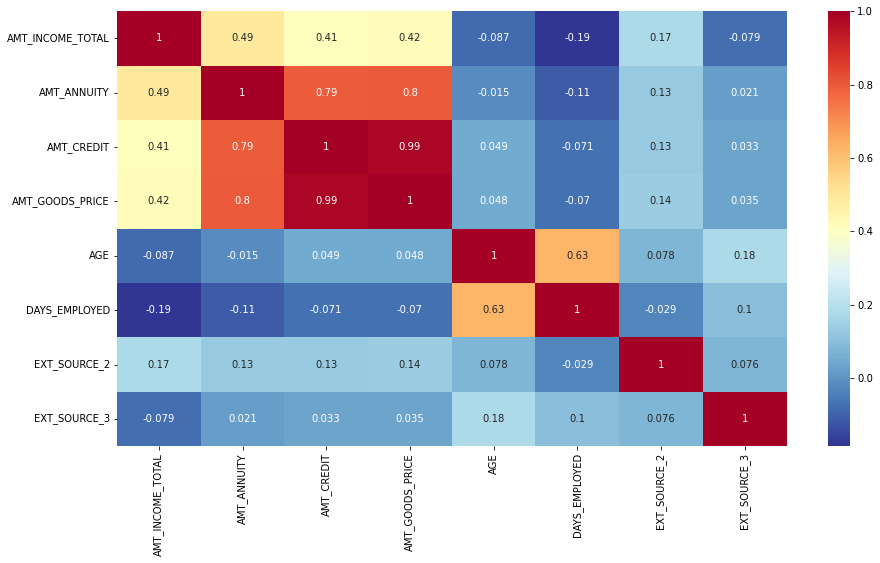

In [227]:
# Check relation between non defaulters

non_defaulters_df = app_data[(app_data.TARGET == 0)][['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT', 'AMT_GOODS_PRICE', 'AGE', 'DAYS_EMPLOYED','EXT_SOURCE_2','EXT_SOURCE_3']]


non_defaulters_df.corr()

plt.figure(figsize = (15,8))
sns.heatmap(non_defaulters_df.corr(), cmap = 'RdYlBu_r', annot = True)
plt.show()



##### Non Defaulters
* We can say there is high correlation between Ammount credited with loan annuity, good price
* Also age and date of employment have some relations

,AMT_INCOME_TOTAL,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AGE,DAYS_EMPLOYED,EXT_SOURCE_2,EXT_SOURCE_3
AMT_INCOME_TOTAL,1.000000,0.436508,0.355803,0.357775,-0.002804,-0.125535,0.145069,-0.086962
AMT_ANNUITY,0.436508,1.000000,0.759897,0.760749,0.013191,-0.084708,0.115759,0.030244
AMT_CREDIT,0.355803,0.759897,1.000000,0.982183,0.137802,0.003289,0.120587,0.052939
AMT_GOODS_PRICE,0.357775,0.760749,0.982183,1.000000,0.139150,0.008149,0.130552,0.054211
AGE,-0.002804,0.013191,0.137802,0.139150,1.000000,0.581862,0.108397,0.134242
DAYS_EMPLOYED,-0.125535,-0.084708,0.003289,0.008149,0.581862,1.000000,0.000963,0.082336
EXT_SOURCE_2,0.145069,0.115759,0.120587,0.130552,0.108397,0.000963,1.000000,0.048949
EXT_SOURCE_3,-0.086962,0.030244,0.052939,0.054211,0.134242,0.082336,0.048949,1.000000


<Figure size 1080x576 with 0 Axes>

<AxesSubplot:>

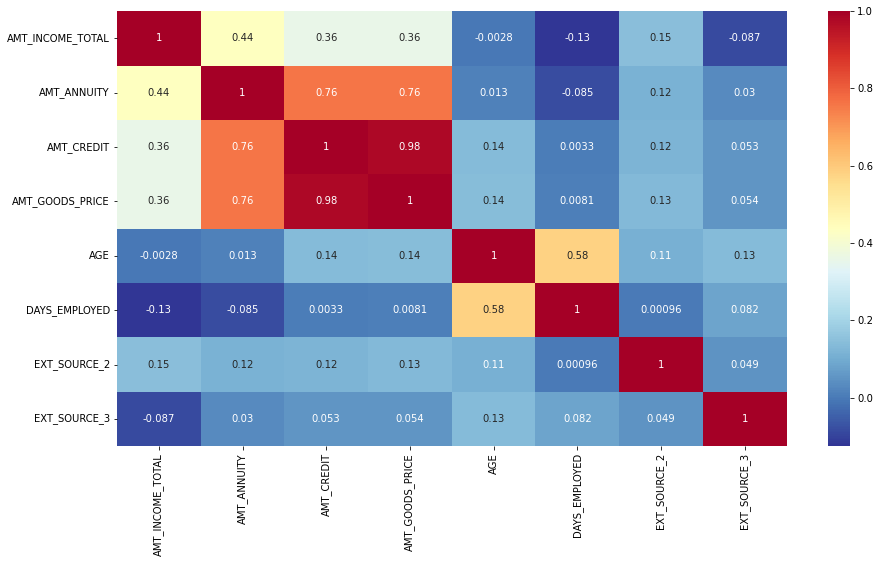

In [228]:
# Check relation between defaulters

defaulters_df = app_data[(app_data.TARGET == 1)][['AMT_INCOME_TOTAL','AMT_ANNUITY','AMT_CREDIT', 'AMT_GOODS_PRICE', 'AGE', 'DAYS_EMPLOYED','EXT_SOURCE_2','EXT_SOURCE_3']]
defaulters_df.corr()

plt.figure(figsize = (15,8))
sns.heatmap(defaulters_df.corr(), cmap = 'RdYlBu_r', annot = True)
plt.show()

#### Defaulters
* Credit amount is related to annuity and goods price
* Repayers have more correlation with days eployed (0.63) where as here it is 0.58
* There is drop in correlation between total income and ammount credit in  defaulters than repayers

In [229]:
app_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'AMT_INCOME_RANGE',
       'AMT_CREDIT_RANGE', 'AMT_GOODS_PRICE_RANGE', 'AGE_RANGE'],
      dtype='object')

AGE_RANGE,20-30,30-40,40-50,50-60,60-70,All
AMT_INCOME_RANGE,,,,,,
<100000,0.127728,0.106221,0.080952,0.056736,0.050292,0.082003
100000-200000,0.118857,0.100834,0.079883,0.062137,0.049187,0.085496
200000-300000,0.099197,0.083072,0.070134,0.064158,0.049550,0.075508
300000-400000,0.074627,0.064717,0.059627,0.048077,0.038704,0.059522
All,0.114536,0.094404,0.075784,0.060318,0.049268,0.080734


<AxesSubplot:xlabel='AGE_RANGE', ylabel='AMT_INCOME_RANGE'>

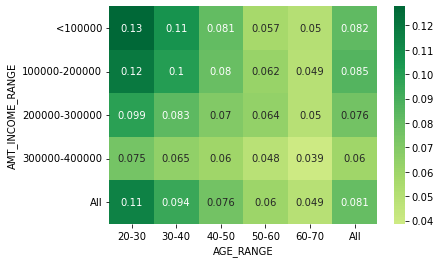

In [230]:
res=pd.pivot_table(data=app_data, index="AMT_INCOME_RANGE", columns=['AGE_RANGE'], values="TARGET" , margins=True)

#app_data['TARGET'].value_counts(normalize = True, dropna = False)

#cant_data_cols = ['AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'AMT_GOODS_PRICE_RANGE',
 #      'AGE_RANGE']

res
#'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_GOODS_PRICE', 'AGE'
sns.heatmap(res, annot= True, cmap="RdYlGn", center = 0.01)
plt.show()

#len(app_data[(app_data.TARGET == 1) & (app_data.AGE_RANGE == '20-30') & (app_data.AMT_INCOME_RANGE == '<100000')])
#len(app_data[(app_data.TARGET == 0) & (app_data.AGE_RANGE == '20-30') & (app_data.AMT_INCOME_RANGE == '<100000')])
#len(app_data[(app_data.TARGET == 1) & (app_data.AGE_RANGE == '40-50') & (app_data.AMT_INCOME_RANGE == '100000-200000')])
#len(app_data[(app_data.TARGET == 0) & (app_data.AGE_RANGE == '40-50') & (app_data.AMT_INCOME_RANGE == '100000-200000')])


#### Analysis
* People with income less than 200000 and age 20-30 are more of defaulters

<AxesSubplot:xlabel='AMT_CREDIT_RANGE', ylabel='AMT_INCOME_RANGE'>

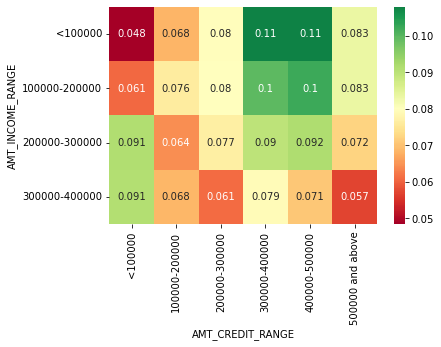

In [231]:
res=pd.pivot_table(data=app_data, index="AMT_INCOME_RANGE", columns=['AMT_CREDIT_RANGE'], values="TARGET")


#'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_GOODS_PRICE', 'AGE'
sns.heatmap(res, annot= True, cmap="RdYlGn", center = 0.08)
plt.show()



#### Analysis
* If credit provided is between 3 to 5 lack and income is less than 2 lac then defaulters ration is high 


CODE_GENDER,F,M,All
NAME_INCOME_TYPE,,,
Businessman,0.000000,0.000000,0.000000
Commercial associate,0.066670,0.088287,0.074850
Maternity leave,0.500000,0.000000,0.400000
Pensioner,0.049534,0.073190,0.053850
State servant,0.053353,0.068812,0.057518
Student,0.000000,0.000000,0.000000
Unemployed,0.352941,0.400000,0.363636
Working,0.083713,0.114945,0.095908
All,0.069968,0.101477,0.080734


<AxesSubplot:xlabel='CODE_GENDER', ylabel='NAME_INCOME_TYPE'>

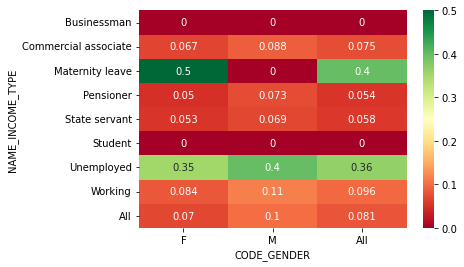

CODE_GENDER,F,M,All
NAME_CONTRACT_TYPE,,,
Cash loans,0.071811,0.105772,0.083459
Revolving loans,0.052664,0.058503,0.054584
All,0.069968,0.101477,0.080734


<AxesSubplot:xlabel='CODE_GENDER', ylabel='NAME_CONTRACT_TYPE'>

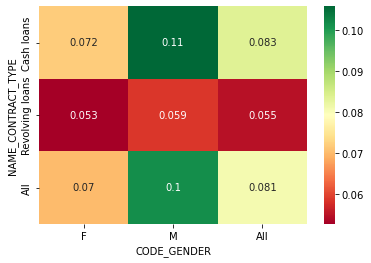

<Figure size 1080x576 with 0 Axes>

CODE_GENDER                             F                       \
NAME_INCOME_TYPE              Businessman Commercial associate   
NAME_EDUCATION_TYPE                                              
Academic degree                       NaN             0.038462   
Higher education                      0.0             0.047391   
Incomplete higher                     NaN             0.075536   
Lower secondary                       NaN             0.122271   
Secondary / secondary special         NaN             0.076449   
All                                   0.0             0.066670   

CODE_GENDER                                                                    \
NAME_INCOME_TYPE              Maternity leave Pensioner State servant Student   
NAME_EDUCATION_TYPE                                                             
Academic degree                           NaN  0.000000      0.000000     NaN   
Higher education                          0.0  0.036652      0.036745     0.0   
Incomplete higher                         NaN  0.040302      0.069530     NaN   
Lower secondary                           NaN  0.060231      0.112676     NaN   
Secondary / secondary special             1.0  0.051468      0.064314     0.0   
All                                       0.5  0.049534      0.053353     0.0   

CODE_GENDER                                                  M  \
NAME_INCOME_TYPE              Unemployed   Working Businessman   
NAME_EDUCATION_TYPE                                              
Academic degree                      NaN  0.055556         NaN   
Higher education                0.000000  0.055975         0.0   
Incomplete higher               0.500000  0.089055         NaN   
Lower secondary                      NaN  0.131579         NaN   
Secondary / secondary special   0.454545  0.091730         NaN   
All                             0.352941  0.083713         0.0   

CODE_GENDER                                                                   \
NAME_INCOME_TYPE              Commercial associate Maternity leave Pensioner   
NAME_EDUCATION_TYPE                                                            
Academic degree                           0.000000             NaN  0.000000   
Higher education                          0.059172             0.0  0.057305   
Incomplete higher                         0.091988             NaN  0.057851   
Lower secondary                           0.121739             NaN  0.091483   
Secondary / secondary special             0.102895             NaN  0.076704   
All                                       0.088287             0.0  0.073190   

CODE_GENDER                                                               \
NAME_INCOME_TYPE              State servant Student Unemployed   Working   
NAME_EDUCATION_TYPE                                                        
Academic degree                    0.000000     NaN        NaN  0.000000   
Higher education                   0.044594     0.0        0.0  0.072838   
Incomplete higher                  0.064286     0.0        0.0  0.097724   
Lower secondary                    0.000000     NaN        NaN  0.157838   
Secondary / secondary special      0.088338     0.0        1.0  0.125209   
All                                0.068812     0.0        0.4  0.114945   

CODE_GENDER                         All  
NAME_INCOME_TYPE                         
NAME_EDUCATION_TYPE                      
Academic degree                0.018293  
Higher education               0.053558  
Incomplete higher              0.084835  
Lower secondary                0.109363  
Secondary / secondary special  0.089403  
All                            0.080734

<AxesSubplot:xlabel='CODE_GENDER-NAME_INCOME_TYPE', ylabel='NAME_EDUCATION_TYPE'>

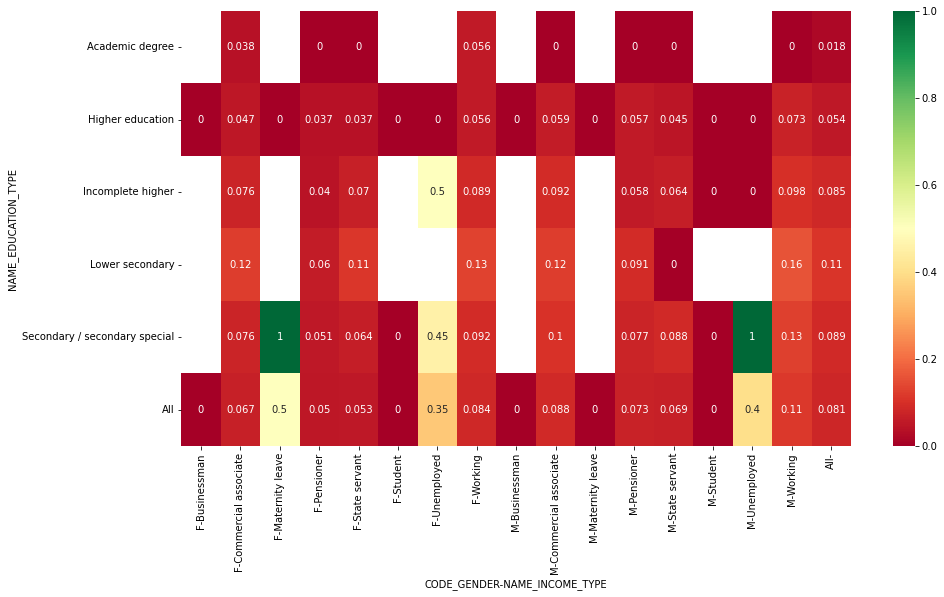

CODE_GENDER,F,M,All
NAME_FAMILY_STATUS,,,
Civil marriage,0.084365,0.134282,0.099459
Married,0.067952,0.088234,0.075592
Separated,0.067633,0.133535,0.081996
Single / not married,0.077594,0.132838,0.098092
Widow,0.054567,0.121111,0.058293
All,0.069968,0.101477,0.080734


<AxesSubplot:xlabel='CODE_GENDER', ylabel='NAME_FAMILY_STATUS'>

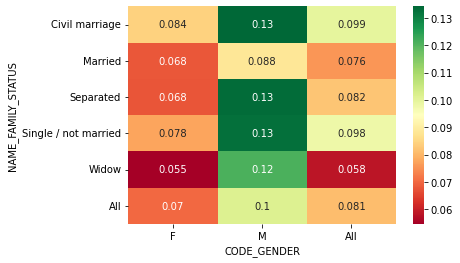

CODE_GENDER,F,M,All
NAME_HOUSING_TYPE,,,
Co-op apartment,0.072917,0.089286,0.079464
House / apartment,0.067593,0.098590,0.077962
Municipal apartment,0.074272,0.112019,0.085438
Office apartment,0.066580,0.063712,0.065392
Rented apartment,0.114694,0.133675,0.123052
With parents,0.104621,0.131753,0.117056
All,0.069968,0.101477,0.080734


<AxesSubplot:xlabel='CODE_GENDER', ylabel='NAME_HOUSING_TYPE'>

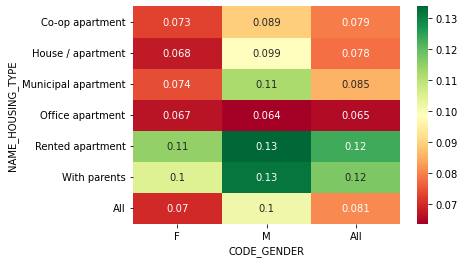

NAME_FAMILY_STATUS,Civil marriage,Married,Separated,Single / not married,Widow,All
NAME_HOUSING_TYPE,,,,,,
Co-op apartment,0.066667,0.062038,0.153846,0.112319,0.037037,0.079464
House / apartment,0.096290,0.073592,0.078169,0.094619,0.057313,0.077962
Municipal apartment,0.103741,0.080289,0.088819,0.097756,0.066327,0.085438
Office apartment,0.096916,0.061957,0.063584,0.065617,0.056075,0.065392
Rented apartment,0.136364,0.115875,0.141176,0.130154,0.074468,0.123052
With parents,0.135102,0.113333,0.117647,0.116314,0.111111,0.117056
All,0.099459,0.075592,0.081996,0.098092,0.058293,0.080734


<AxesSubplot:xlabel='NAME_FAMILY_STATUS', ylabel='NAME_HOUSING_TYPE'>

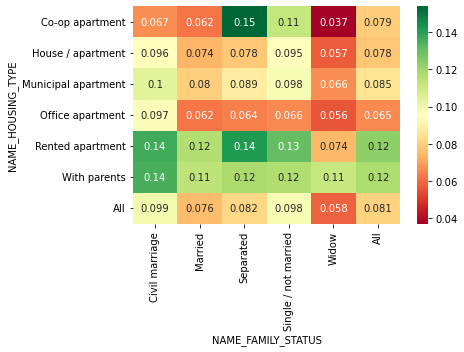

<Figure size 1080x576 with 0 Axes>

NAME_EDUCATION_TYPE Academic degree      Higher education            \
CODE_GENDER                       F    M                F         M   
AMT_INCOME_RANGE                                                      
<100000                    0.000000  0.0         0.056125  0.080479   
100000-200000              0.000000  0.0         0.050136  0.074363   
200000-300000              0.040000  0.0         0.046368  0.062545   
300000-400000              0.086957  0.0         0.037191  0.045390   
All                        0.030000  0.0         0.048479  0.063954   

NAME_EDUCATION_TYPE Incomplete higher           Lower secondary            \
CODE_GENDER                         F         M               F         M   
AMT_INCOME_RANGE                                                            
<100000                      0.085837  0.123967        0.080193  0.125000   
100000-200000                0.083144  0.095699        0.106178  0.150990   
200000-300000                0.065898  0.088323        0.097561  0.111588   
300000-400000                0.080645  0.075812        0.029412  0.074074   
All                          0.080159  0.092184        0.092641  0.135063   

NAME_EDUCATION_TYPE Secondary / secondary special                 All  
CODE_GENDER                                     F         M            
AMT_INCOME_RANGE                                                       
<100000                                  0.076685  0.118084  0.082003  
100000-200000                            0.078253  0.121258  0.085496  
200000-300000                            0.073852  0.102331  0.075508  
300000-400000                            0.066154  0.089200  0.059522  
All                                      0.076719  0.113689  0.080734

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE-CODE_GENDER', ylabel='AMT_INCOME_RANGE'>

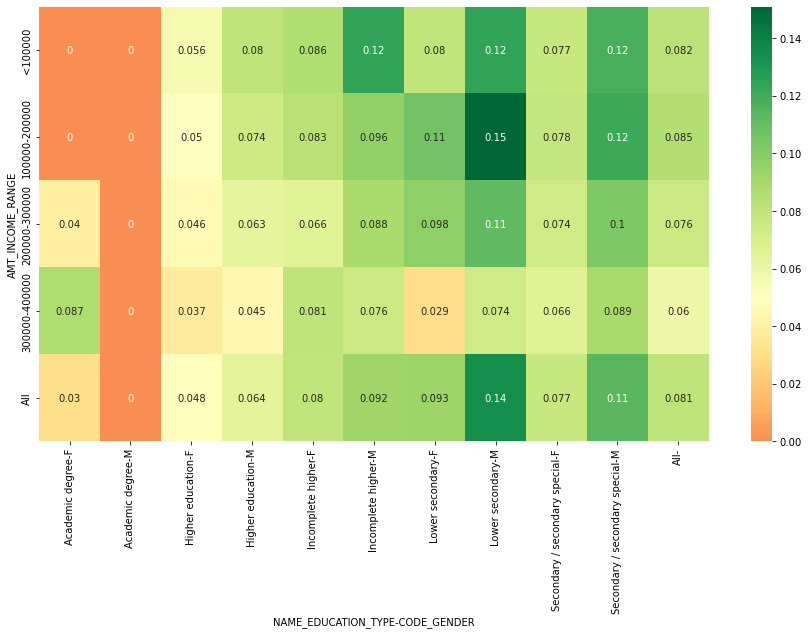

In [232]:
var_list = ['TARGET','CODE_GENDER','NAME_CONTRACT_TYPE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE']

res=pd.pivot_table(data=app_data, index="NAME_INCOME_TYPE", columns=['CODE_GENDER'], values="TARGET", margins=True)

res
#'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_GOODS_PRICE', 'AGE'
sns.heatmap(res, annot= True, cmap="RdYlGn")
plt.show()

res=pd.pivot_table(data=app_data, index="NAME_CONTRACT_TYPE", columns=['CODE_GENDER'], values="TARGET", margins=True)

res
#'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_GOODS_PRICE', 'AGE'
sns.heatmap(res, annot= True, cmap="RdYlGn")
plt.show()

plt.figure(figsize = (15,8))

res=pd.pivot_table(data=app_data, index="NAME_EDUCATION_TYPE", columns=['CODE_GENDER','NAME_INCOME_TYPE'], values="TARGET", margins=True)

res
#'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_GOODS_PRICE', 'AGE'
sns.heatmap(res, annot= True, cmap="RdYlGn")
plt.show()

res=pd.pivot_table(data=app_data, index="NAME_FAMILY_STATUS", columns=['CODE_GENDER'], values="TARGET", margins=True)

res
#'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_GOODS_PRICE', 'AGE'
sns.heatmap(res, annot= True, cmap="RdYlGn")
plt.show()



res=pd.pivot_table(data=app_data, index="NAME_HOUSING_TYPE", columns=['CODE_GENDER'], values="TARGET", margins=True)

res
#'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_GOODS_PRICE', 'AGE'
sns.heatmap(res, annot= True, cmap="RdYlGn")
plt.show()


res=pd.pivot_table(data=app_data, index="NAME_HOUSING_TYPE", columns=['NAME_FAMILY_STATUS'], values="TARGET", margins=True)

res
#'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_GOODS_PRICE', 'AGE'
sns.heatmap(res, annot= True, cmap="RdYlGn")
plt.show()


plt.figure(figsize = (15,8))

res=pd.pivot_table(data=app_data, index="AMT_INCOME_RANGE", columns=['NAME_EDUCATION_TYPE','CODE_GENDER'], values="TARGET", margins=True)

res
#'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_GOODS_PRICE', 'AGE'
sns.heatmap(res, annot= True, cmap="RdYlGn", center = 0.05)
plt.show()




#### Analysis
* Defaulter ratio with unempployed and maternity leave is high  compared to others
* Unemployed male are more defaulters then female 
* Male with cash loans are more defaulters 
* Unemployed male secondary/ secondary special education are more defaulters
* Female unemployed with secondary or secondary special education are more of defaulters
* Male with any family status are in defaulters category. 
* Person with houseing type retired apartment or who lives with parents have more tendancy to become defaulters

#### Previous Data

In [233]:
prev_app_data.shape
prev_app_data.info()
prev_app_data.describe()

(1670214, 37)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,5951.000000,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,0.188357,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,0.087671,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115833,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,0.034781,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,0.160716,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,0.189122,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,0.193330,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,1.000000,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [234]:
(prev_app_data.isnull().mean() * 100).sort_values(ascending = False)

RATE_INTEREST_PRIVILEGED       99.643698
RATE_INTEREST_PRIMARY          99.643698
AMT_DOWN_PAYMENT               53.636480
RATE_DOWN_PAYMENT              53.636480
NAME_TYPE_SUITE                49.119754
NFLAG_INSURED_ON_APPROVAL      40.298129
DAYS_TERMINATION               40.298129
DAYS_LAST_DUE                  40.298129
DAYS_LAST_DUE_1ST_VERSION      40.298129
DAYS_FIRST_DUE                 40.298129
DAYS_FIRST_DRAWING             40.298129
AMT_GOODS_PRICE                23.081773
AMT_ANNUITY                    22.286665
CNT_PAYMENT                    22.286366
PRODUCT_COMBINATION             0.020716
AMT_CREDIT                      0.000060
NAME_YIELD_GROUP                0.000000
NAME_PORTFOLIO                  0.000000
NAME_SELLER_INDUSTRY            0.000000
SELLERPLACE_AREA                0.000000
CHANNEL_TYPE                    0.000000
NAME_PRODUCT_TYPE               0.000000
SK_ID_PREV                      0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_CLIENT_TYPE

In [235]:
# We will drop column having null values more than 40 percent


In [236]:
null_data=(prev_app_data.isnull().mean() * 100)
col_to_be_drop = null_data[null_data.values >=40.00].index.tolist()

In [237]:
prev_app_data.drop(col_to_be_drop, inplace = True, axis = 1)
prev_app_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high


In [238]:
prev_app_data.shape
prev_app_data.columns

(1670214, 26)

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [239]:
irrelevant_colm = ['FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY','WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START' ]
prev_app_data.drop(irrelevant_colm, inplace = True, axis =1)
prev_app_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION'],
      dtype='object')

In [240]:
prev_app_data.isnull().mean() * 100

SK_ID_PREV                 0.000000
SK_ID_CURR                 0.000000
NAME_CONTRACT_TYPE         0.000000
AMT_ANNUITY               22.286665
AMT_APPLICATION            0.000000
AMT_CREDIT                 0.000060
AMT_GOODS_PRICE           23.081773
NAME_CASH_LOAN_PURPOSE     0.000000
NAME_CONTRACT_STATUS       0.000000
DAYS_DECISION              0.000000
NAME_PAYMENT_TYPE          0.000000
CODE_REJECT_REASON         0.000000
NAME_CLIENT_TYPE           0.000000
NAME_GOODS_CATEGORY        0.000000
NAME_PORTFOLIO             0.000000
NAME_PRODUCT_TYPE          0.000000
CHANNEL_TYPE               0.000000
SELLERPLACE_AREA           0.000000
NAME_SELLER_INDUSTRY       0.000000
CNT_PAYMENT               22.286366
NAME_YIELD_GROUP           0.000000
PRODUCT_COMBINATION        0.020716
dtype: float64

In [241]:
#app_data['AMT_ANNUITY'].fillna(value=round(,1), inplace = True)
#prev_app_data['AMT_ANNUITY'].mean()
#prev_app_data['AMT_ANNUITY'].mode()
#prev_app_data['AMT_ANNUITY'].describe()

# As percentage of null values in AMT_ANNUITY and AMT_GOODS_PRICE and CNT_PAYMENT is too high we shall not immpute the data
# Instead we shall ignore these records

In [242]:
prev_app_data = prev_app_data[(~(np.isnan(prev_app_data['AMT_ANNUITY']) & np.isnan(prev_app_data['AMT_GOODS_PRICE']) & np.isnan(prev_app_data['CNT_PAYMENT'])))]
prev_app_data.shape

(1336359, 22)

In [243]:
prev_app_data.isnull().mean() * 100

SK_ID_PREV                0.000000
SK_ID_CURR                0.000000
NAME_CONTRACT_TYPE        0.000000
AMT_ANNUITY               2.871983
AMT_APPLICATION           0.000000
AMT_CREDIT                0.000075
AMT_GOODS_PRICE           3.865728
NAME_CASH_LOAN_PURPOSE    0.000000
NAME_CONTRACT_STATUS      0.000000
DAYS_DECISION             0.000000
NAME_PAYMENT_TYPE         0.000000
CODE_REJECT_REASON        0.000000
NAME_CLIENT_TYPE          0.000000
NAME_GOODS_CATEGORY       0.000000
NAME_PORTFOLIO            0.000000
NAME_PRODUCT_TYPE         0.000000
CHANNEL_TYPE              0.000000
SELLERPLACE_AREA          0.000000
NAME_SELLER_INDUSTRY      0.000000
CNT_PAYMENT               2.871609
NAME_YIELD_GROUP          0.000000
PRODUCT_COMBINATION       0.000000
dtype: float64

In [244]:
# Now we can use mean values to fill in null values

print('AMT_ANNUITY')
prev_app_data.AMT_ANNUITY.describe().apply(lambda p: ' %.2f' % p)

print('AMT_GOODS_PRICE')
prev_app_data.AMT_GOODS_PRICE.describe().apply(lambda p: ' %.2f' % p)

print('CNT_PAYMENT')
prev_app_data.CNT_PAYMENT.describe().apply(lambda p: ' %.2f' % p)

AMT_ANNUITY


count     1297979.00
mean        15955.12
std         14782.14
min             0.00
25%          6321.78
50%         11250.00
75%         20658.42
max        418058.15
Name: AMT_ANNUITY, dtype: object

AMT_GOODS_PRICE


count     1284699.00
mean       227847.28
std        315396.56
min             0.00
25%         50841.00
50%        112320.00
75%        234000.00
max       6905160.00
Name: AMT_GOODS_PRICE, dtype: object

CNT_PAYMENT


count     1297984.00
mean           16.05
std            14.57
min             0.00
25%             6.00
50%            12.00
75%            24.00
max            84.00
Name: CNT_PAYMENT, dtype: object

In [245]:
prev_app_data['AMT_ANNUITY'].fillna(value=round(prev_app_data['AMT_ANNUITY'].mean(),1), inplace = True)

In [246]:
# We ignored goods price in app data . Similarly lets ignore records with na goods price

prev_app_data = prev_app_data[~np.isnan(prev_app_data['AMT_GOODS_PRICE'])]

In [247]:
prev_app_data = prev_app_data[~np.isnan(prev_app_data['AMT_CREDIT'])]

In [248]:
prev_app_data.CNT_PAYMENT = prev_app_data.CNT_PAYMENT.fillna(prev_app_data.CNT_PAYMENT.mean()) 

In [249]:
prev_app_data.DAYS_DECISION.value_counts()

-364     1289
-329     1239
-238     1233
-352     1231
-245     1219
         ... 
-2886     128
-2922     127
-2921     123
-2902     122
-1          2
Name: DAYS_DECISION, Length: 2922, dtype: int64

In [250]:
#Check for outliers

In [251]:
def setBoundInprev_app_datata(name):
    q1=prev_app_data[name].describe()["25%"]
    q3=prev_app_data[name].describe()["75%"]
    interquartile_range=q3-q1 #interquartile range
    lower_bound=q1-1.5*interquartile_range
    upper_bound=q3+1.5*interquartile_range
    prev_app_data[name]=np.where(prev_app_data[name]>upper_bound,upper_bound,prev_app_data[name])
    prev_app_data[name]=np.where(prev_app_data[name]<lower_bound,lower_bound,prev_app_data[name])
    

<AxesSubplot:ylabel='AMT_ANNUITY'>

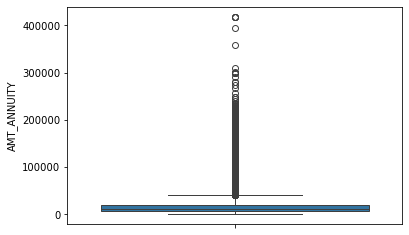

<AxesSubplot:ylabel='AMT_APPLICATION'>

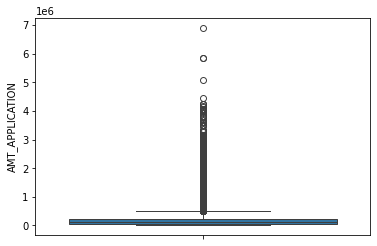

<AxesSubplot:ylabel='AMT_CREDIT'>

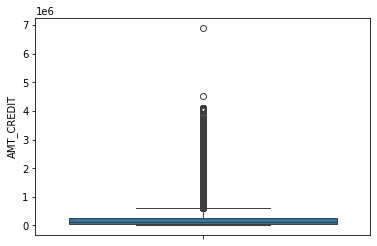

<AxesSubplot:ylabel='AMT_GOODS_PRICE'>

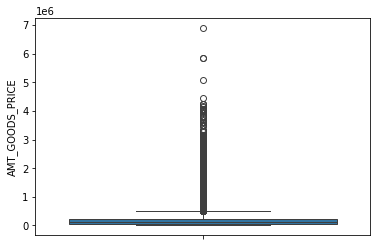

<AxesSubplot:ylabel='CNT_PAYMENT'>

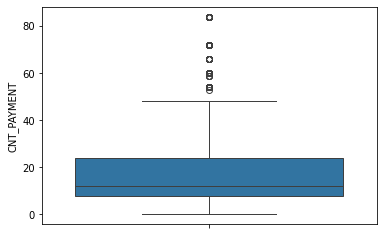

<AxesSubplot:ylabel='DAYS_DECISION'>

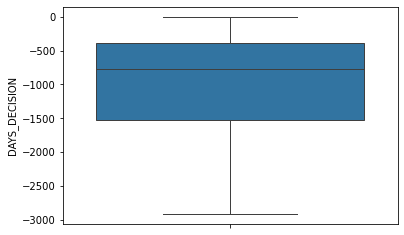

In [252]:
columns = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT','DAYS_DECISION']
for colmn in columns:
    sns.boxplot(prev_app_data[colmn])
    plt.show()

<AxesSubplot:ylabel='AMT_ANNUITY'>

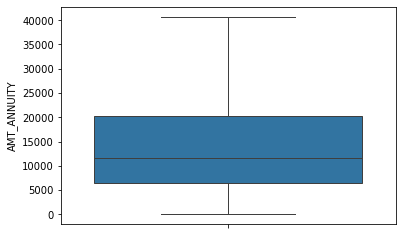

<AxesSubplot:ylabel='AMT_APPLICATION'>

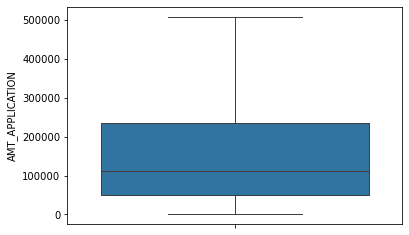

<AxesSubplot:ylabel='AMT_CREDIT'>

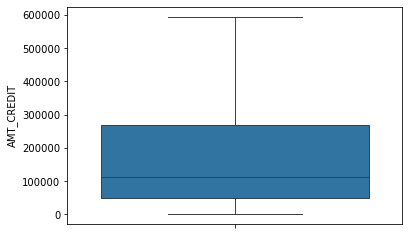

<AxesSubplot:ylabel='AMT_GOODS_PRICE'>

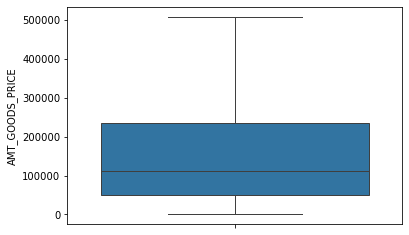

<AxesSubplot:ylabel='CNT_PAYMENT'>

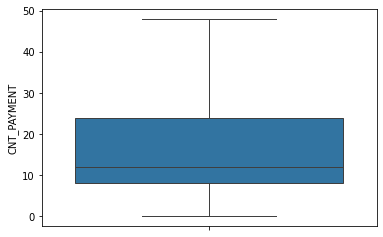

<AxesSubplot:ylabel='DAYS_DECISION'>

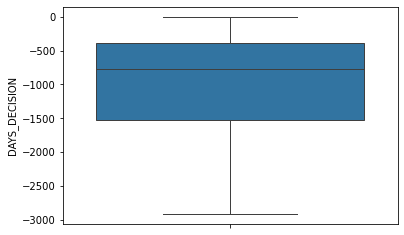

In [253]:
columns = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT', 'AMT_GOODS_PRICE', 'CNT_PAYMENT','DAYS_DECISION']
for colmn in columns:
    setBoundInprev_app_datata(colmn)    
    sns.boxplot(prev_app_data[colmn])
    plt.show()

In [254]:
prev_app_data.shape

(1284699, 22)

In [255]:
prev_app_data.DAYS_DECISION = prev_app_data.DAYS_DECISION.astype('int').abs()

In [256]:
prev_app_data['MONTHS'] = round(prev_app_data.DAYS_DECISION/30)
prev_app_data.drop(["DAYS_DECISION"], axis =1)

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,MONTHS
0,2030495,271877,Consumer loans,1730.4300,17145.0,17145.00,17145.0,XAP,Approved,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,2.0
1,2802425,108129,Cash loans,25188.6150,508738.5,594672.75,508738.5,XNA,Approved,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,5.0
2,2523466,122040,Cash loans,15060.7350,112500.0,136444.50,112500.0,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,10.0
3,2819243,176158,Cash loans,40708.8675,450000.0,470790.00,450000.0,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,17.0
4,1784265,202054,Cash loans,31924.3950,337500.0,404055.00,337500.0,Repairs,Refused,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,Consumer loans,14704.2900,267295.5,311400.00,267295.5,XAP,Approved,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,43,Furniture,30.0,low_normal,POS industry with interest,18.0
1670210,2357031,334635,Consumer loans,6622.0200,87750.0,64291.50,87750.0,XAP,Approved,Cash through the bank,XAP,New,Furniture,POS,XNA,Stone,43,Furniture,12.0,middle,POS industry with interest,56.0
1670211,2659632,249544,Consumer loans,11520.8550,105237.0,102523.50,105237.0,XAP,Approved,Cash through the bank,XAP,Repeater,Consumer Electronics,POS,XNA,Country-wide,1370,Consumer electronics,10.0,low_normal,POS household with interest,50.0
1670212,2785582,400317,Cash loans,18821.5200,180000.0,191880.00,180000.0,XNA,Approved,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,AP+ (Cash loan),-1,XNA,12.0,low_normal,Cash X-Sell: low,40.0


In [257]:
prev_app_data.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'MONTHS'],
      dtype='object')

In [258]:
# Few data insights from prev_app data

<AxesSubplot:xlabel='MONTHS', ylabel='Density'>

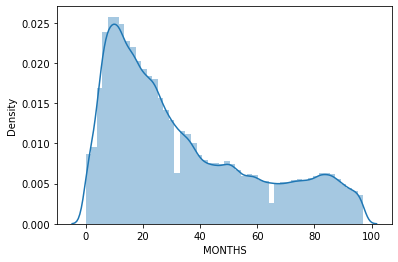

In [259]:
sns.distplot(prev_app_data['MONTHS'])

In [260]:
# Most of the decisions are taken between 15 to 30 months

<Figure size 1800x1080 with 0 Axes>

<AxesSubplot:>

Consumer loans     0.566509
Cash loans         0.360844
Revolving loans    0.072647
Name: NAME_CONTRACT_TYPE, dtype: float64

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE', ylabel='count'>

([0, 1, 2], [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'NAME_CONTRACT_TYPE')

<AxesSubplot:>

Approved        0.773680
Refused         0.197379
Unused offer    0.020574
Canceled        0.008367
Name: NAME_CONTRACT_STATUS, dtype: float64

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'NAME_CONTRACT_STATUS')

<AxesSubplot:>

Repeater     0.680362
New          0.231780
Refreshed    0.087129
XNA          0.000729
Name: NAME_CLIENT_TYPE, dtype: float64

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'NAME_CLIENT_TYPE')

<AxesSubplot:>

POS      0.537878
Cash     0.359277
Cards    0.072643
XNA      0.029871
Cars     0.000331
Name: NAME_PORTFOLIO, dtype: float64

<AxesSubplot:xlabel='NAME_PORTFOLIO', ylabel='count'>

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'NAME_PORTFOLIO')

<AxesSubplot:>

XAP       0.782041
HC        0.114053
LIMIT     0.042542
SCO       0.028495
CLIENT    0.020574
SCOFR     0.006412
XNA       0.003188
VERIF     0.002629
SYSTEM    0.000066
Name: CODE_REJECT_REASON, dtype: float64

<AxesSubplot:xlabel='CODE_REJECT_REASON', ylabel='count'>

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'CODE_REJECT_REASON')

<AxesSubplot:>

XNA                     0.379311
Consumer electronics    0.303478
Connectivity            0.208687
Furniture               0.044698
Construction            0.023133
Clothing                0.018625
Industry                0.014902
Auto technology         0.003882
Jewelry                 0.002108
MLM partners            0.000777
Tourism                 0.000399
Name: NAME_SELLER_INDUSTRY, dtype: float64

<AxesSubplot:xlabel='NAME_SELLER_INDUSTRY', ylabel='count'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'NAME_SELLER_INDUSTRY')

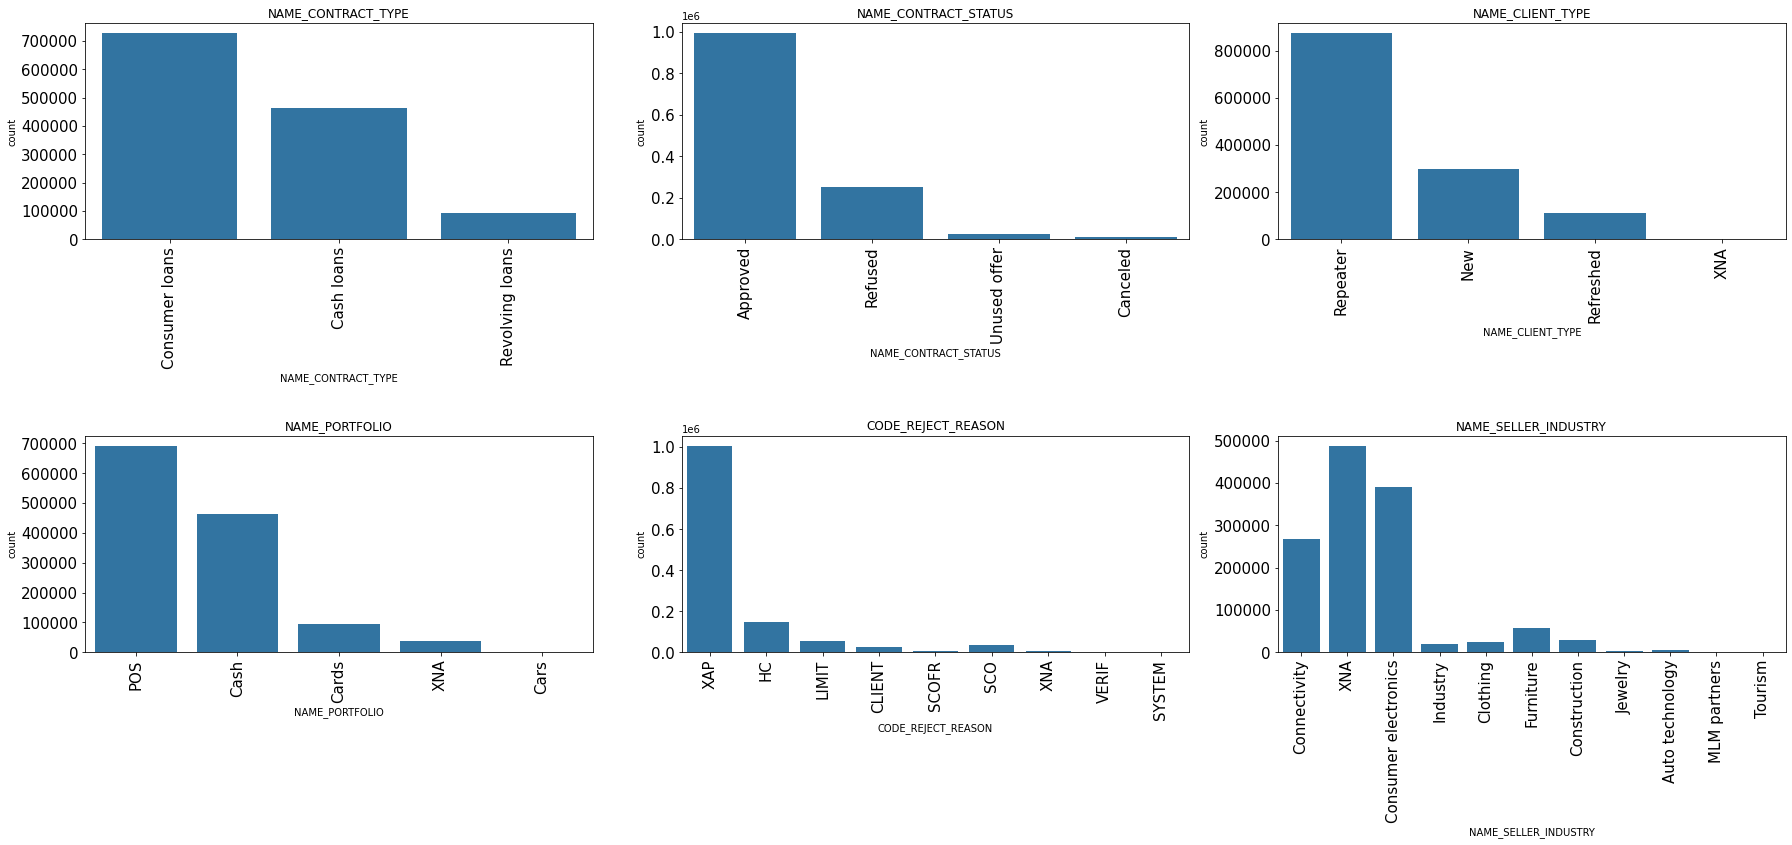

In [261]:
colm_list = ['NAME_CONTRACT_TYPE','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO', "CODE_REJECT_REASON", "NAME_SELLER_INDUSTRY" ]

x = 0

plt.figure(figsize = (25,15))

for column in colm_list:
    x += 1
    plt.subplot(3,3,x)
    prev_app_data[column].value_counts(normalize=True)
    sns.countplot(x = column, data = prev_app_data)    
    plt.xticks(rotation= 90, fontsize = 15)
    plt.yticks(rotation= 0, fontsize = 15)
    plt.tight_layout()
    plt.title(column)
    

> Few imp insights of data set

* Cosumer loans are more in applications (55%)
* Almost 77% loans are approved
* Repeater % is very high
* POS loans are 53% followed by cash 33
* XAP reason is almost 78%

In [262]:
## Merge both data frames

In [263]:
merg_data = pd.merge(app_data, prev_app_data, on ='SK_ID_CURR', how = 'left')
merg_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_EMPLOYED,DAYS_ID_PUBLISH,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE,AMT_GOODS_PRICE_RANGE,AGE_RANGE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,MONTHS
0,100002,1,Cash loans,M,0,202500.0,406597.5,24700.5,351000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,637,2120,NaN,Laborers,1.0,2,2,0,0,Business Entity Type 3,0.262949,0.139376,0.0,0.0,0.0,0.0,0.0,1.0,26,200000-300000,400000-500000,300000-400000,20-30,1038818.0,Consumer loans,9251.7750,179055.0,179055.00,179055.0,XAP,Approved,606.0,XNA,XAP,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,20.0
1,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1188,291,NaN,Core staff,2.0,1,1,0,0,School,0.622246,0.510853,0.0,0.0,0.0,0.0,0.0,0.0,46,200000-300000,500000 and above,500000 and above,40-50,1810518.0,Cash loans,40708.8675,508738.5,594672.75,508738.5,XNA,Approved,746.0,XNA,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,25.0
2,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1188,291,NaN,Core staff,2.0,1,1,0,0,School,0.622246,0.510853,0.0,0.0,0.0,0.0,0.0,0.0,46,200000-300000,500000 and above,500000 and above,40-50,2636178.0,Consumer loans,40708.8675,337500.0,348637.50,337500.0,XAP,Approved,828.0,Cash through the bank,XAP,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,28.0
3,100003,0,Cash loans,F,0,270000.0,1293502.5,35698.5,1129500.0,State servant,Higher education,Married,House / apartment,0.003541,1188,291,NaN,Core staff,2.0,1,1,0,0,School,0.622246,0.510853,0.0,0.0,0.0,0.0,0.0,0.0,46,200000-300000,500000 and above,500000 and above,40-50,2396755.0,Consumer loans,6737.3100,68809.5,68053.50,68809.5,XAP,Approved,2341.0,Cash through the bank,XAP,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,78.0
4,100004,0,Revolving loans,M,0,67500.0,135000.0,6750.0,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,225,2531,26.0,Laborers,1.0,2,2,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,0.0,0.0,52,<100000,100000-200000,100000-200000,50-60,1564014.0,Consumer loans,5357.2500,24282.0,20106.00,24282.0,XAP,Approved,815.0,Cash through the bank,XAP,New,Mobile,POS,XNA,Regional / Local,30.0,Connectivity,4.0,middle,POS mobile without interest,27.0


In [264]:
merg_data.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       'AMT_GOODS_PRICE_x', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'OCCUPATION_TYPE',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE', 'AMT_INCOME_RANGE',
       'AMT_CREDIT_RANGE', 'AMT_GOODS_PRICE_RANGE', 'AGE_RANGE', 'SK_ID_PREV',
       'NAME_CONTRACT_TYPE_y', 'AMT_ANNUITY_y', 'AMT_APPLICATION',
       'AMT_CREDIT_y', 'AMT_GOODS_PRICE_

<Figure size 1800x3600 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='NAME_CONTRACT_TYPE_x', ylabel='count'>

([0, 1], [Text(0, 0, ''), Text(0, 0, '')])

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:>

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='count'>

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000., 900000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:>

<AxesSubplot:xlabel='NAME_CLIENT_TYPE', ylabel='count'>

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:>

<AxesSubplot:xlabel='NAME_PORTFOLIO', ylabel='count'>

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:>

<AxesSubplot:xlabel='CODE_REJECT_REASON', ylabel='count'>

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000., 900000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<AxesSubplot:>

<AxesSubplot:xlabel='NAME_SELLER_INDUSTRY', ylabel='count'>

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

(array([     0.,  50000., 100000., 150000., 200000., 250000., 300000.,
        350000., 400000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

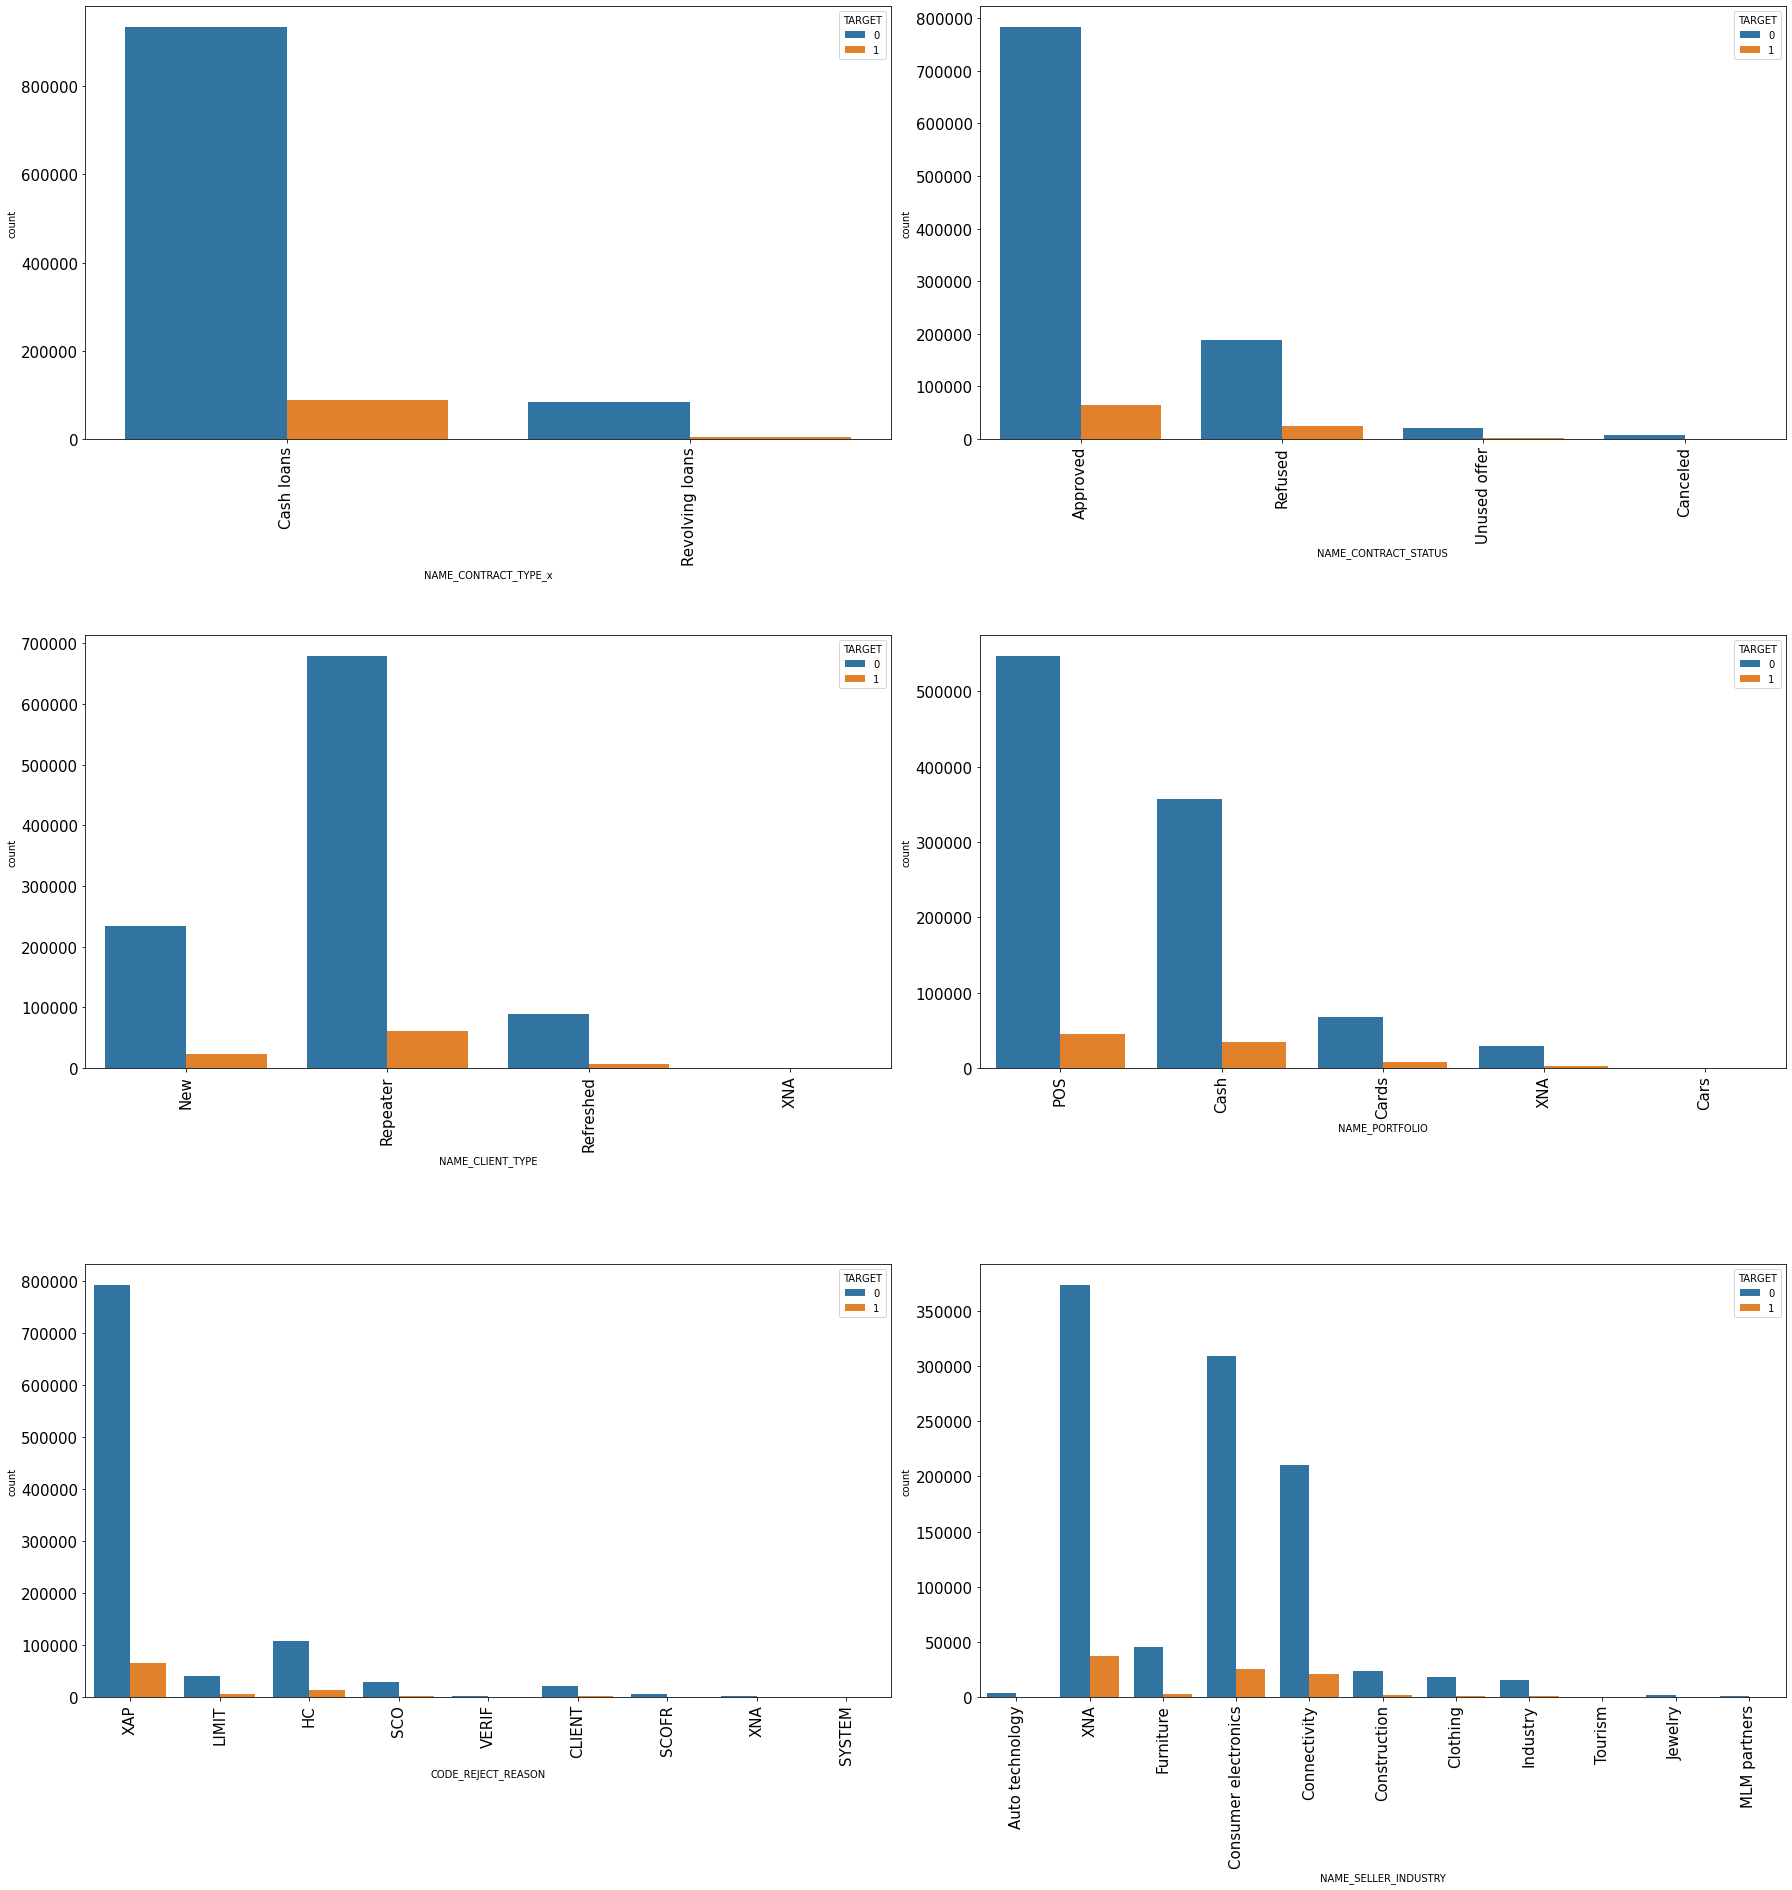

In [265]:
colm_list = ['NAME_CONTRACT_TYPE_x','NAME_CONTRACT_STATUS','NAME_CLIENT_TYPE','NAME_PORTFOLIO', "CODE_REJECT_REASON", "NAME_SELLER_INDUSTRY" ]

x = 0
plt.figure(figsize = (25,50))
for variable in colm_list:
    x += 1
    plt.subplot(6,2,x)
    sns.countplot(x = variable, hue = 'TARGET', data = merg_data)
    plt.xticks(rotation= 90, fontsize = 15)
    plt.yticks(rotation= 0, fontsize = 15)
    
    plt.tight_layout()

* Repeater loans are too high and its approval percentage is also more
* Consumer electronics and connectivity loan percentage and also approval is high

In [266]:
bins = [0,3,6,9,12,15,18,21,24,100000]
slots = ['<3','3-6','6-9','9-12','12-15','15-18','18-21','21-24','24 and above']

merg_data['MONTHS_RANGE'] = pd.cut(merg_data['MONTHS'], bins = bins, labels=slots)



NAME_SELLER_INDUSTRY,Auto technology,Clothing,Connectivity,Construction,Consumer electronics,Furniture,Industry,Jewelry,MLM partners,Tourism,XNA
MONTHS_RANGE,,,,,,,,,,,
<3,0.115294,0.055128,0.107309,0.078697,0.081374,0.056032,0.131783,0.098619,0.024242,0.133333,0.094955
3-6,0.072848,0.049288,0.105974,0.088018,0.079412,0.055713,0.086142,0.076190,0.047970,0.020979,0.102497
6-9,0.104636,0.053272,0.112493,0.079513,0.090828,0.062882,0.058347,0.084314,0.062176,0.049505,0.100807
9-12,0.111834,0.057906,0.112450,0.059126,0.087513,0.056833,0.071429,0.130631,0.075269,0.016667,0.098736
12-15,0.099585,0.057546,0.110783,0.075048,0.085067,0.070887,0.085395,0.047619,0.103448,0.058824,0.099579
15-18,0.094923,0.061074,0.112697,0.064169,0.088028,0.071108,0.076326,NaN,NaN,NaN,0.102929
18-21,0.116279,0.054545,0.105984,0.071059,0.085842,0.059033,0.085008,NaN,NaN,NaN,0.099650
21-24,0.155340,0.063385,0.103560,0.065496,0.084737,0.062549,0.075986,NaN,NaN,NaN,0.090856
24 and above,0.200000,0.057053,0.081783,0.059675,0.070052,0.059187,0.067125,NaN,NaN,NaN,0.077252


<Figure size 1800x1440 with 0 Axes>

<AxesSubplot:xlabel='NAME_SELLER_INDUSTRY', ylabel='MONTHS_RANGE'>

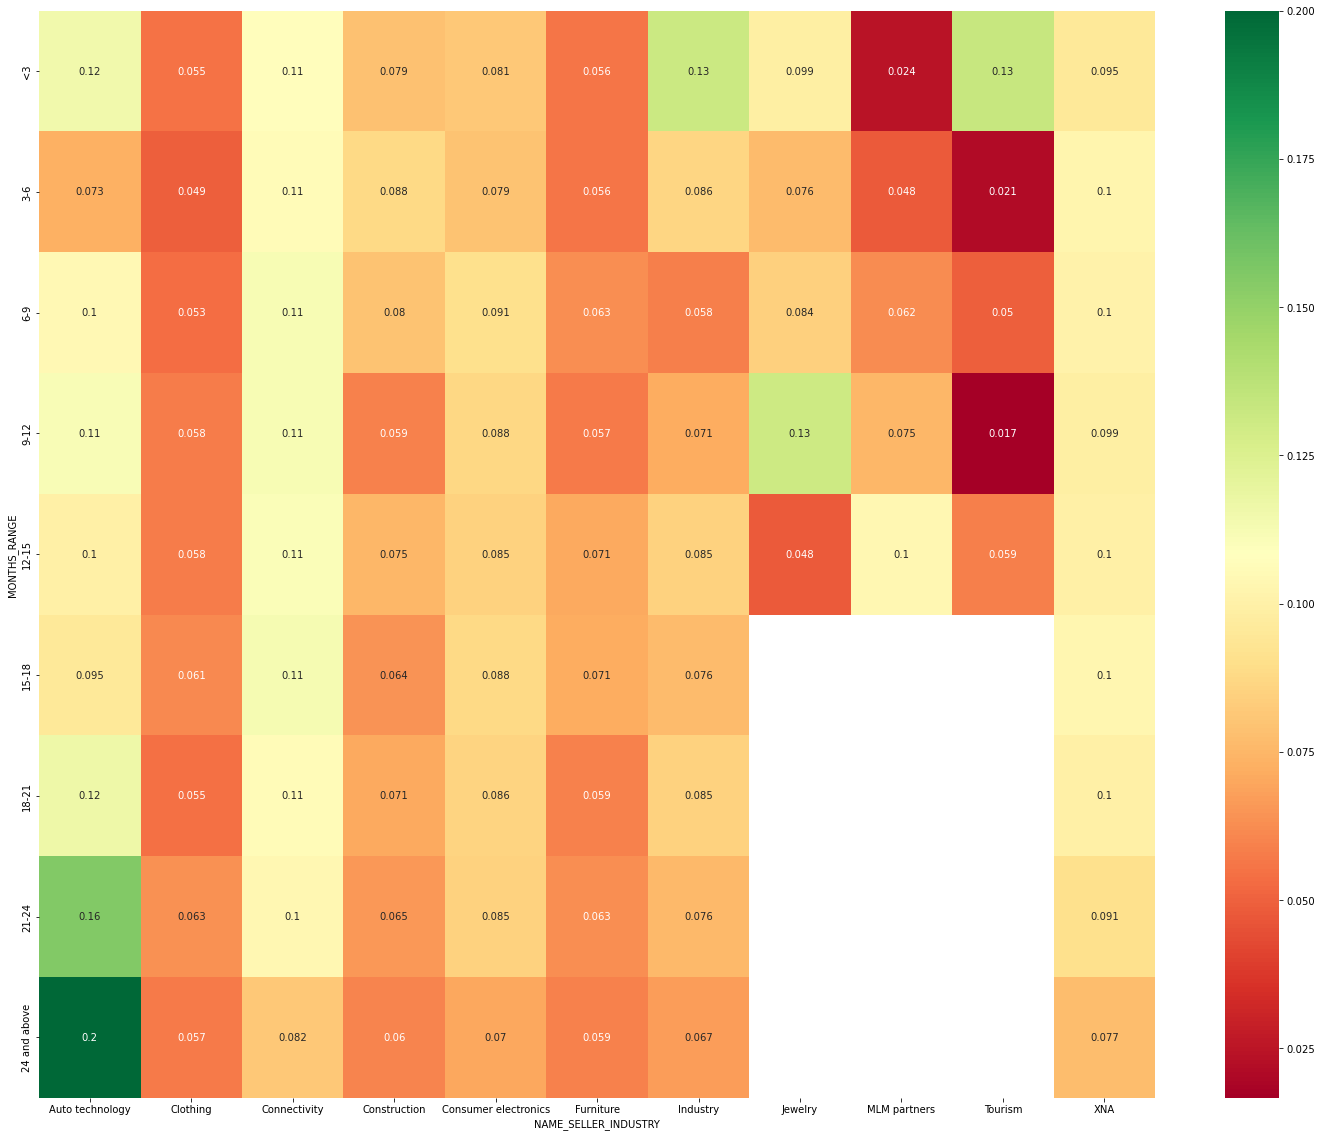

In [267]:
res=pd.pivot_table(data=merg_data, index="MONTHS_RANGE", columns=['NAME_SELLER_INDUSTRY'], values="TARGET")

res
#'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_GOODS_PRICE', 'AGE'
plt.figure(figsize = (25,20))
sns.heatmap(res, annot= True, cmap="RdYlGn")
plt.show()

NAME_CONTRACT_STATUS,Approved,Canceled,Refused,Unused offer
MONTHS_RANGE,,,,
<3,0.082377,0.066582,0.116477,0.113417
3-6,0.078635,0.075713,0.124371,0.099260
6-9,0.087033,0.085526,0.120864,0.085517
9-12,0.081837,0.085586,0.126922,0.082402
12-15,0.081955,0.094393,0.132834,0.083645
15-18,0.083973,0.103270,0.144602,0.096824
18-21,0.083668,0.092857,0.139277,0.073567
21-24,0.081759,0.100000,0.127002,0.083594
24 and above,0.070310,0.105590,0.095117,0.075348


<Figure size 1800x1440 with 0 Axes>

<AxesSubplot:xlabel='NAME_CONTRACT_STATUS', ylabel='MONTHS_RANGE'>

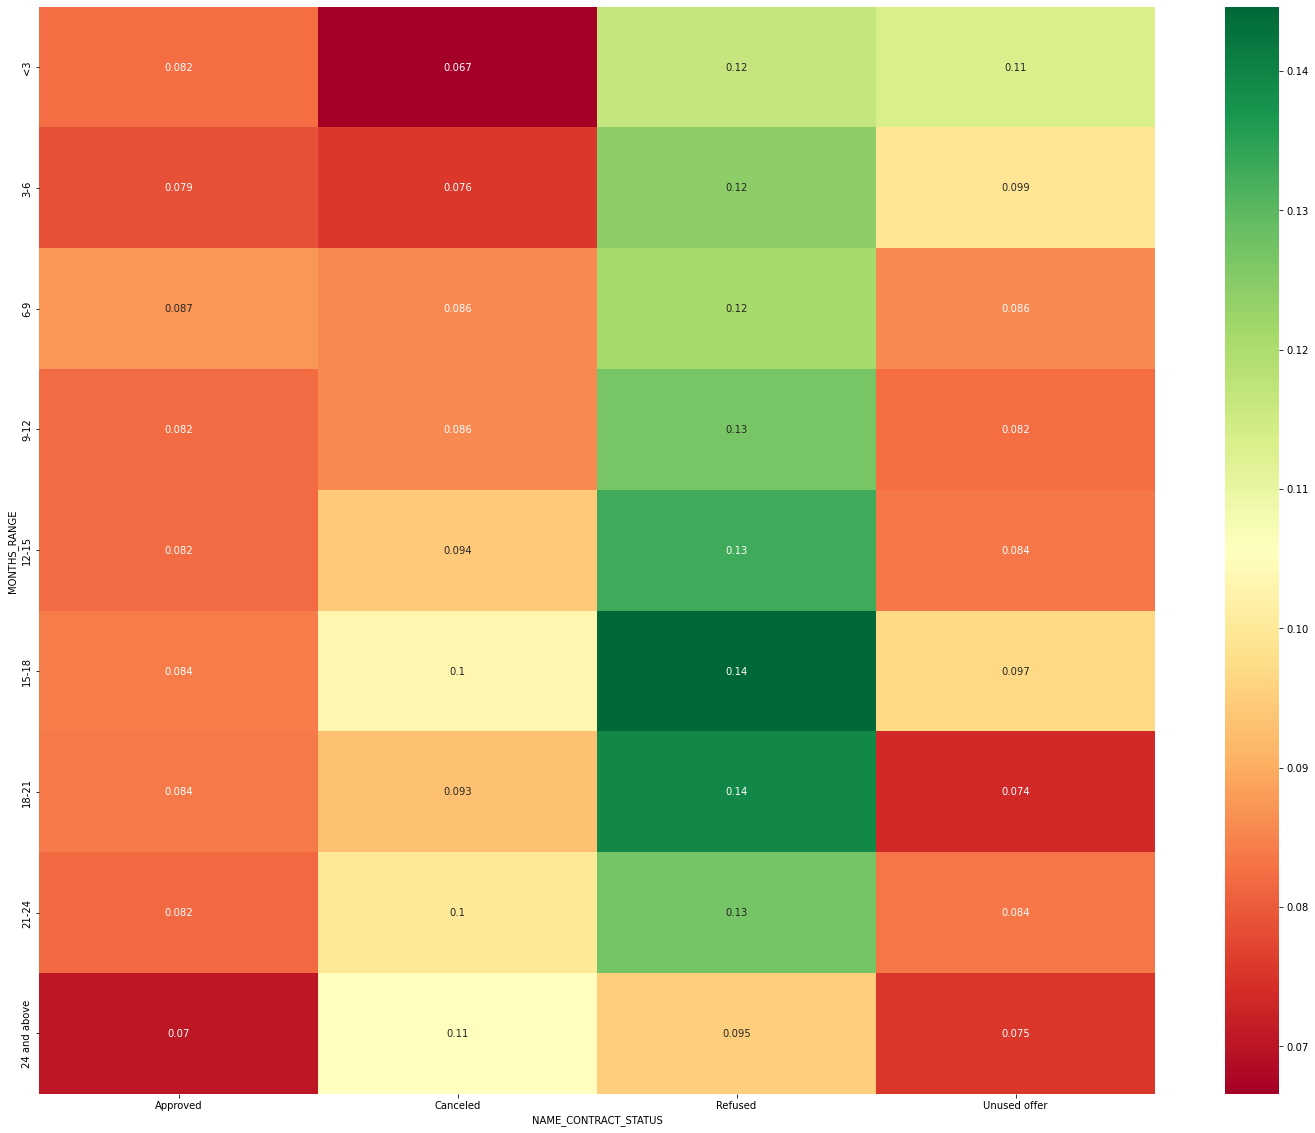

In [268]:
res=pd.pivot_table(data=merg_data, index="MONTHS_RANGE", columns=['NAME_CONTRACT_STATUS'], values="TARGET")

res
#'AMT_INCOME_TOTAL','AMT_CREDIT', 'AMT_GOODS_PRICE', 'AGE'
plt.figure(figsize = (25,20))
sns.heatmap(res, annot= True, cmap="RdYlGn")
plt.show()

<Figure size 936x504 with 0 Axes>

<AxesSubplot:>

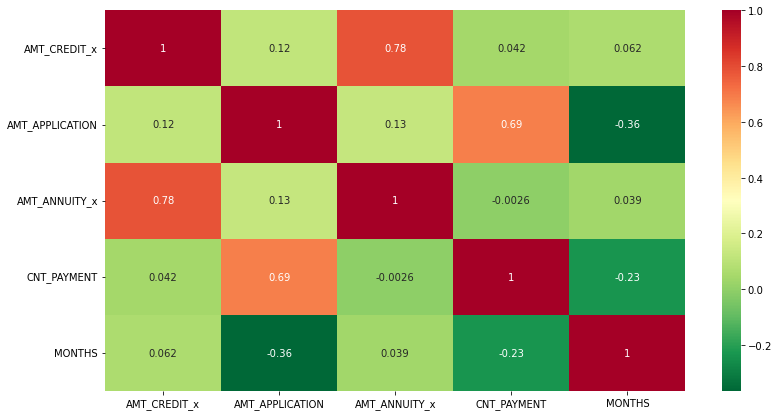

In [269]:
merg_data_corr = merg_data[['AMT_CREDIT_x', 'AMT_APPLICATION', 'AMT_ANNUITY_x', 'CNT_PAYMENT', 'MONTHS']]
plt.figure(figsize = (13,7))
sns.heatmap(merg_data_corr.corr(), cmap = 'RdYlGn_r', annot = True )
plt.show()

<Figure size 720x360 with 0 Axes>

<AxesSubplot:>

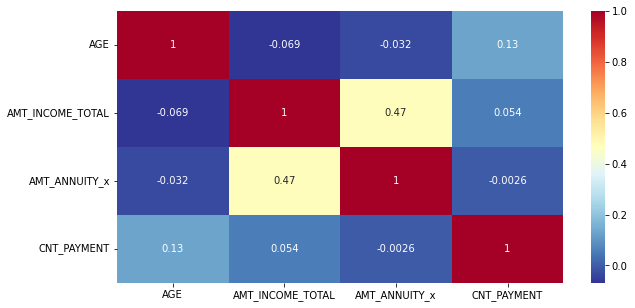

In [270]:
cols_list = ['AGE', 'AMT_INCOME_TOTAL','AMT_ANNUITY_x', 'CNT_PAYMENT', 'NAME_CONTRACT_TYPE_x']
plt.figure(figsize = (10,5))
sns.heatmap(merg_data[cols_list].corr(), cmap = 'RdYlBu_r', annot = True)
plt.show()

## Conclusion

1. Education Level: Secondary or secondary special education graduates struggle with loan payments.
2. Contract Type and Gender:
* Female borrowers with consumer loans have a
higher default rate.
* Female gender is less likely to face payment
difficulties compared to males.
* Recommendation: Approve more loans for
females.
3. Credit Amount: Lower credit amount borrowers and very
high credit amount borrowers are at higher risk of
defaulting.
4. Marital Status:
* Married individuals struggle more with loan payments than single or separated people.
* More approved applicants are married.
* Suggestion: Consider loan approval for single or
divorced individuals.
5. Applicant Type: Repeater applicants have both a high
chance of non-defaulting and a high chance of defaulting compared to new applicants.